<a href="https://colab.research.google.com/github/DomiStryj/MHE2023/blob/main/K_Route_Inspection_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem chińskiego listonosza/Route Inspection Problem

In [17]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 1s (225 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
Read

# Opis problemu

Problem chińskiego listonosza polega na znalezieniu najkrótszej trasy do przejścia dla listonosza. Punktem startowym i kończowym jest poczta, miejsca, do których listonosz ma się udać z przesyłkami to wierzchołki grafu, a każda z ulic to krawędź.
Droga listonosza powinna wyglądać następująco:
1. listonosz odbiera przesyłki na poczcie
2. listonosz zanosi przesyłki do odbiorców, czyli musi dotrzeć do każdego z wierzchołków grafu, co najmniej jeden raz
3. listonosz kończy swoją trasę na poczcie.

Problem należy do problemów np, tylko wtedy, gdy graf nie zawiera cyklu Eulera.

Rozwiązaniem zadania jest znalezienie drogi, której suma wag krawędzi cyklu jest najmniejszą sumą wag krawędzi wszystkich takich cykli w grafie.

# Implementacja

# Przykład grafu, który można wykorzystać do wykonania zadania

Do wykonania zadania potrzebny będzie graf bez cyklu Eulera, czyli graf nieskierowany. Wierzchołek startowy i końcowy grafu to poczta, wierzchołki to skrzyżowania ulic, a ulice to krawędzie, które posiadają swoje wagi.



```
                   3
        (a)-----------------(b)
     1 /  |                  |  \1
      /   |                  |   \
     (c)  | 5               6|   (d)
      \   |                  |   /
     2 \  |         4        |  /1
        (e)------------------(f)
       
       a - b - d - f - d - b - f - e - c - a - c - e - a
```



In [18]:
import ast
with open("graf.txt", 'r') as f:
    punkty, odcinki, dlugosci = map(ast.literal_eval, f.readlines())

załadowany plik zawiera : 


*   pierwszy wiersz: odwiedzane punkty np . a,b,c
*   drugi wiersz: odcinki na podstawie punktów np. ac, ae
*   trzeci wiersz : wartość poszególnych odcinków 



#Funkcja celu

In [19]:
import numpy as np
import ast
import copy
import math
import random

In [20]:
def funkcjaCelu(rozwiazanie, punkt, odcinki, dlugosci):
    suma = 0
    tmp = []
    try:
        for i in range(0, len(rozwiazanie), 1): # na podstawie kolejności odwiedzanych punktów przydzieliłam pasujące do nich odcinki
            odc = punkt[rozwiazanie[i] - 1] + punkt[rozwiazanie[i + 1] - 1]
            # print(odc)
            tmp.append(odc)      # wszystkie odcinki znajdują się w tablicy tmp
    except IndexError:
        pass
    # print(tmp)
    for x in range(0, len(tmp), 1):     # dodajemy długości odcinków na podstawie tablicy tmp
        for y in range(0, len(odcinki), 1):
            if tmp[x] == odcinki[y]:
                suma += dlugosci[y]
    return suma
  
print("Trasa jaką przybył nasz listanosz wynosi :",funkcjaCelu([1, 3, 5, 6, 4, 2, 1],punkty,odcinki,dlugosci))

Trasa jaką przybył nasz listanosz wynosi : 12


Powyższy kod to funkcja celu ,  która przyjmuje tablice z listą odwiedzanych punktów oraz dane  z załadowanego pliku czyli punkty ,  odcinki, oraz ich długości. W efekcie końcowym funkcja celu zwraca łączną wartość jaką przebył nasz listanosz na wyznaczonej trasie. 

# Losowy sąsiad

W kolejnym etapie ważnym jest, aby wylosować najlepszego sąsiada, czyli wierzchołek (dom), który ma odwiedzić listonosz. Najlepszy sąsiad jest równy wierzchołkowi, do którego dotarcia listonosz pokonuje najkrótszą drogę. 


In [21]:
def losowySasiad(roz, punkty, odcinki):
    dl_max_roz = len(roz)   # maks. dł. rozwiązania
    ptk = int(random.randint(0, len(roz) - 1)) #losuje ptk z zakresu rozwiązania
    del roz[ptk + 1:]   # kasuję tablice od wybranego ptk
    for k in range(len(roz), dl_max_roz, 1):
        punkt = punkty[roz[-1] - 1] #sprawdzam ptk z konca skasowanej tablicy
        kolejne_wierzch = []
        for i in range(0, len(odcinki), 1):  # wyznaczam dostępne wierzchołki na podst. ptk z końca tablicy
            if odcinki[i][:1] == punkt:
                kolejne_wierzch.append(odcinki[i][1:])
        p = int(random.uniform(0, len(kolejne_wierzch))) #losujemy nowy wierzchołek dostępny z listy
        for j in range(0, len(punkty), 1):          #dopisuje nowy wierzchołek
            if punkty[j] == kolejne_wierzch[p]:
                roz.append(j + 1)
    return roz



# Generowanie losowej kolejności 

W celu zastosowania algorytmu , kolejnym krokiem jest wygenerowania losowej kolejności odwiedzania wierzchołów przez listonosza. Wraz ze znalezieniem losowego sąsiada, element generowania losowej kolejności jest potrzebny do wykonania algorytmu wspinaczkowego.

In [22]:
def generowanieLosowejKolejnoci(wielkosc_rozw, punkty, odcinki):
    losowa_kolejnosc = [1]    #tablica zaczyna się domyślnie od punktu startu a=1 - poczta
    for k in range(0, wielkosc_rozw - 1, 1):
        punkt = punkty[losowa_kolejnosc[-1] - 1] #zmienna posiada informacje punktu w którym się znajdujemy
        kolejne_wierzch = []
        for i in range(0, len(odcinki), 1):   #petla wyznacza kolejne wierzchołki
            if odcinki[i][:1] == punkt:
                kolejne_wierzch.append(odcinki[i][1:])
        p = int(random.uniform(0, len(kolejne_wierzch))) #losujemy liczbę o wielkości tablicy w której znajdują się dostępne wierzchołki
        for j in range(0, len(punkty), 1):
            if punkty[j] == kolejne_wierzch[p]:  # dodajemy wylosowany wierzchołek do kolejki
                losowa_kolejnosc.append(j + 1)
    return losowa_kolejnosc

# Algorytm wspinaczkowy

In [23]:
import time
import psutil

In [24]:
historia_wspinaczkowy_sekwencje=[[1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]]
historia_wspinaczkowy_czas =[0]
historia_wspinaczkowy_długość = [60]
historia_wspinaczkowy_procesor =[0]
historia_wspinaczkowy_czas_procesor =[0]


def wspinaczkowy(cel):
    max_dl_roz = len(odcinki)  # maksymalny rozmiar rozwiązania
    min_dl_roz = int((len(odcinki) / 2) - 1)  # najmniejszy rozmiar rozwiązania
    iteracje = 2000  # ilość literacji
    tablica = []  # lista punktów odwiedzanych w proponowanym rozwiązaniu

    najlepszy_wynik = [1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1] #początkowa permutacja
    while max_dl_roz >= min_dl_roz:
        for j in range(0, iteracje, 1):
            roz = generowanieLosowejKolejnoci(max_dl_roz, punkty, odcinki)   #generowanie losowej kolejności pierwszego rozwiązania 
            nowe_roz = losowySasiad(roz, punkty, odcinki)

            for k in range(1, len(punkty) + 1):
                odw_ptk = k in nowe_roz
                if odw_ptk:
                    tablica.append(k)
            if (len(tablica) >= len(punkty)) and \
                    (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]) and \
                    cel(nowe_roz) <= cel(najlepszy_wynik):    #jeżeli spełni warunki zapisuje jako najlepsze rozwiązanie     
                najlepszy_wynik = nowe_roz         
                historia_wspinaczkowy_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                historia_wspinaczkowy_czas_procesor.append(time.time() - czas_start_aw)   
                znacznik = False
                for i in historia_wspinaczkowy_sekwencje:
                  if i == najlepszy_wynik:
                    znacznik = True
                if znacznik == False:
                  historia_wspinaczkowy_sekwencje.append(najlepszy_wynik)# zapisujemy dane dla celów wizulizacji oraz porównania
                  historia_wspinaczkowy_czas.append(time.time() - czas_start_aw)
                  historia_wspinaczkowy_długość.append(cel(najlepszy_wynik))
            tablica = []
        max_dl_roz -= 1
    
    return najlepszy_wynik
czas_start_aw=time.time()
roz = wspinaczkowy(lambda s: funkcjaCelu(s, punkty, odcinki, dlugosci))
czas_koniec_aw=time.time()-czas_start_aw
print("kolejność odwiedzonych punktów :" , roz)
print("długość najlepszego rozwiązania :",funkcjaCelu(roz,punkty,odcinki,dlugosci))

kolejność odwiedzonych punktów : [1, 3, 5, 6, 4, 2, 1]
długość najlepszego rozwiązania : 12


# Symulowane wyżarzanie

In [25]:

historia_wyzarzanie_sekwencje=[[1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]]
historia_wyzarzanie_czas =[0]
historia_wyzarzanie_długość = [60]
historia_wyzarzanie_procesor = [0]
historia_wyzarzanie_czas_procesor=[0]
def symulowaneWyzarzanie(cel, Temperatura):
    max_dl_roz = len(odcinki)  # maksymalny rozmiar rozwiązania
    min_dl_roz = int((len(odcinki) / 2) - 1)  # najmniejszy rozmiar rozwiązania
    iteracje = 2000  # ilość literacji
    tablica = []  # lista punktów odwiedzanych w proponowanym rozwiązaniu
    najlepszy_wynik =  [1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1] #początkowa permutacja
    while max_dl_roz >= min_dl_roz:
        V = [najlepszy_wynik] # deklarujemy tablicę najlepszych rozwiązań
        for j in range(1, iteracje + 1, 1):
            roz = generowanieLosowejKolejnoci(max_dl_roz, punkty, odcinki) #generujemy rozwiązanie
            nowe_roz =losowySasiad(roz, punkty, odcinki)
            for k in range(1, len(punkty) + 1):
                odw_ptk = k in nowe_roz
                if odw_ptk:
                    tablica.append(k)
            if (len(tablica) == len(punkty)) and \
                    (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]) and \
                    cel(nowe_roz) <= cel(najlepszy_wynik):  # jeżeli spełnia warunki, to zapisuje jako najlepsze rozwiązanie
                najlepszy_wynik = nowe_roz
                historia_wyzarzanie_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                historia_wyzarzanie_czas_procesor.append(time.time() - czas_start_sw) 
                znacznik = False
                for i in historia_wyzarzanie_sekwencje:
                  if i == najlepszy_wynik:
                    znacznik = True
                if znacznik == False:
                  V.append(najlepszy_wynik) # zapisujemy najlepsze rozwiązanie w tablicy
                  historia_wyzarzanie_sekwencje.append(najlepszy_wynik) # zapisujemy dane dla celów wizulizacji oraz porównania
                  historia_wyzarzanie_czas.append(time.time() - czas_start_sw)
                  historia_wyzarzanie_długość.append(cel(najlepszy_wynik))


            else:
                e = math.exp(- abs(cel(najlepszy_wynik) - cel(nowe_roz)) / Temperatura(j)) # jeśli nie spełnia warunków to obliczane jest prawdopodobieństwo ograniczone temperaturą
                u = random.uniform(0.0, 1.0)
                if (u < e) and \
                        (len(tablica) == len(punkty)) and \
                        (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]): # jeśli warunek względem temperatury się zgadza to zapisujemy jako najlepsze rozwiązanie
                    najlepszy_wynik = nowe_roz
                    historia_wyzarzanie_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                    historia_wyzarzanie_czas_procesor.append(time.time() - czas_start_sw) 
                    znacznik = False
                    for i in historia_wyzarzanie_sekwencje:
                      if i == najlepszy_wynik:
                        znacznik = True
                    if znacznik == False:
                      V.append(najlepszy_wynik) # zapisujemy najlepszy wynik w tablicy
                      historia_wyzarzanie_sekwencje.append(najlepszy_wynik)# zapisujemy dane dla celów wizulizacji oraz porównania
                      historia_wyzarzanie_czas.append(time.time() - czas_start_sw)
                      historia_wyzarzanie_długość.append(cel(najlepszy_wynik))
                    
            tablica = []
        max_dl_roz -= 1
    return min(V, key=cel) #wybieram najlepsze rozwiązanie z listy
czas_start_sw=time.time()

roz = symulowaneWyzarzanie(lambda s: funkcjaCelu(s, punkty, odcinki, dlugosci),lambda k: 1000 / k)
czas_koniec_sw=time.time()-czas_start_sw
print("kolejność odwiedzonych punktów", roz)
print("długość najlepszego rozwiązania :", funkcjaCelu(roz,punkty,odcinki,dlugosci))

kolejność odwiedzonych punktów [1, 3, 5, 6, 4, 2, 1]
długość najlepszego rozwiązania : 12


# Porównanie metod oraz wykres

Poprzez wykonanie około 20 prób można stwierdzić, że algorytm wspinaczkowy jest  szybszy, ale ilość możliwych wyników jest mniejsza 

Algorytm wspinaczkowy- wyniki testowe:

In [26]:
print(roz)
print("Czas działania: ", czas_koniec_aw)
print("Ilość rozwiązań spełniających warunek rozwiąznia :", len(historia_wspinaczkowy_długość))

[1, 3, 5, 6, 4, 2, 1]
Czas działania:  1.121366262435913
Ilość rozwiązań spełniających warunek rozwiąznia : 23


Algorytm symulowanego wyżarzania- wyniki testowe:

In [27]:
print(roz)
print("Czas działania: ", czas_koniec_sw)
print("Ilość rozwiązań spełniających warunek rozwiąznia :",len(historia_wyzarzanie_długość))

[1, 3, 5, 6, 4, 2, 1]
Czas działania:  2.3690638542175293
Ilość rozwiązań spełniających warunek rozwiąznia : 139


In [28]:
!pip install --upgrade plotly
!pip install jupyter-dash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[0, 0.003238677978515625, 0.0040378570556640625, 0.00688624382019043, 0.021651029586791992, 0.08002924919128418, 0.145704984664917, 0.15349864959716797, 0.19438576698303223, 0.42156028747558594, 0.44595766067504883, 0.46236228942871094, 0.5434753894805908, 0.6949100494384766, 0.7552688121795654, 0.7589590549468994, 0.8977816104888916, 0.9016046524047852, 0.9161069393157959, 0.9395015239715576, 0.948509693145752, 1.0631959438323975, 1.0640883445739746]
[60, 40, 32, 32, 26, 26, 26, 24, 22, 22, 22, 22, 18, 16, 16, 16, 14, 14, 14, 14, 14, 12, 12]


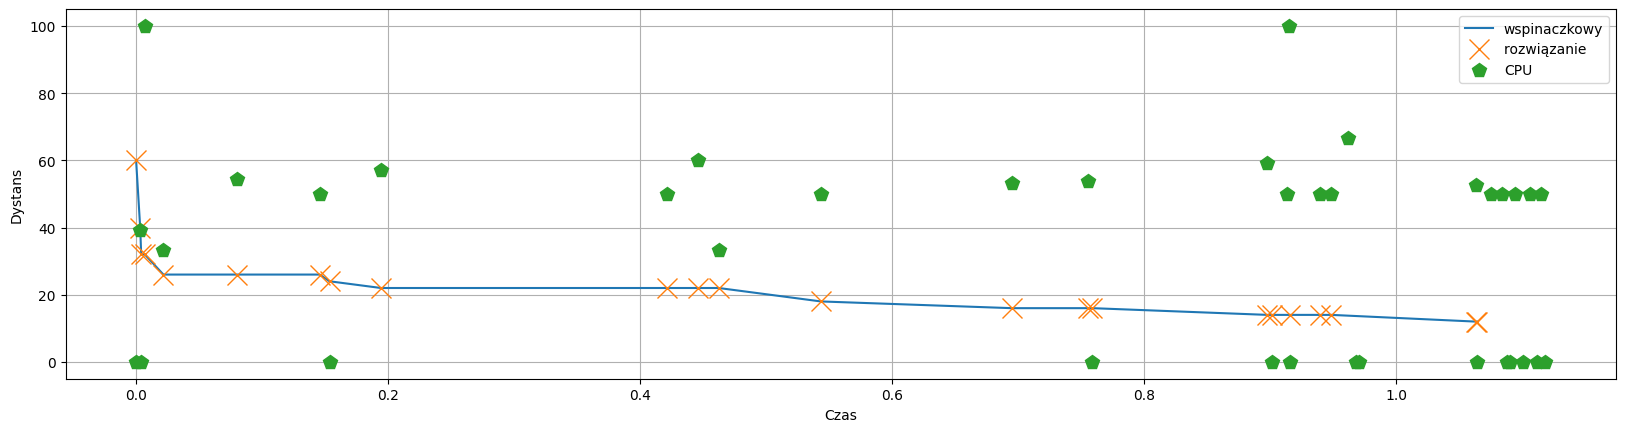

[0, 0.005478620529174805, 0.005701303482055664, 0.006543159484863281, 0.007258176803588867, 0.011350154876708984, 0.012956380844116211, 0.014434337615966797, 0.015353679656982422, 0.018573284149169922, 0.024779081344604492, 0.03455018997192383, 0.035317182540893555, 0.036246299743652344, 0.0365753173828125, 0.040895938873291016, 0.061269521713256836, 0.06603407859802246, 0.0743410587310791, 0.0803380012512207, 0.0890662670135498, 0.08999848365783691, 0.0906972885131836, 0.09169435501098633, 0.10012364387512207, 0.10314726829528809, 0.10461282730102539, 0.11133193969726562, 0.12333273887634277, 0.12987756729125977, 0.19624900817871094, 0.22849583625793457, 0.2808046340942383, 0.28362488746643066, 0.28460216522216797, 0.28523993492126465, 0.29089951515197754, 0.29250431060791016, 0.29268527030944824, 0.3007216453552246, 0.3038358688354492, 0.3191192150115967, 0.325756311416626, 0.3872804641723633, 0.5379738807678223, 0.5397830009460449, 0.5425543785095215, 0.5434780120849609, 0.543922185

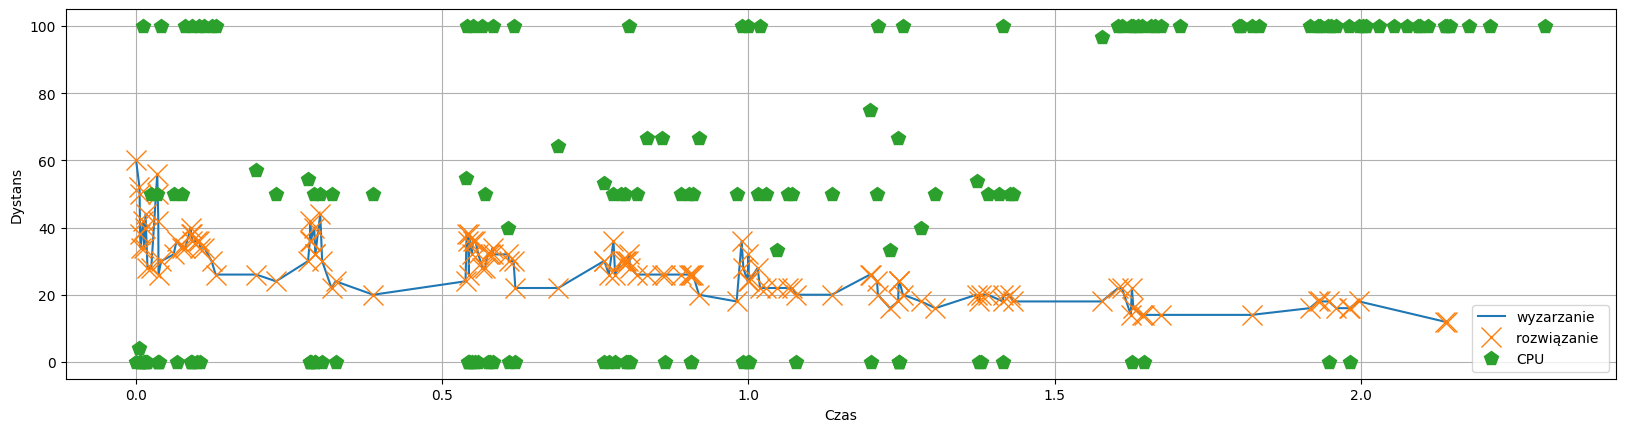

In [29]:
import matplotlib.pyplot as plt


print(historia_wspinaczkowy_czas)
print(historia_wspinaczkowy_długość)

plt.figure().set_figwidth(20)

plt.plot (historia_wspinaczkowy_czas, historia_wspinaczkowy_długość, label = "wspinaczkowy")
plt.plot(historia_wspinaczkowy_czas,historia_wspinaczkowy_długość,'x', label="rozwiązanie ",ms = 15)
plt.plot(historia_wspinaczkowy_czas_procesor,historia_wspinaczkowy_procesor,'p', label="CPU",ms = 10)
plt.xlabel('Czas')
plt.ylabel('Dystans')
plt.legend()
plt.grid()
plt.show()

print( historia_wyzarzanie_czas)
print(historia_wyzarzanie_długość)
plt.figure().set_figwidth(20)
plt.plot (historia_wyzarzanie_czas, historia_wyzarzanie_długość, label = "wyzarzanie")
plt.plot(historia_wyzarzanie_czas,historia_wyzarzanie_długość,'x', label="rozwiązanie ",ms = 15)
plt.plot(historia_wyzarzanie_czas_procesor,historia_wyzarzanie_procesor,'p', label="CPU",ms = 10)
plt.xlabel('Czas')
plt.ylabel('Dystans')
plt.legend()
plt.grid()
plt.show()




# Wizualizacja

---



In [30]:
from manim import *
import numpy as np
import random

Animacja algorytm wspinaczkoy

In [31]:
%%manim MojaScena


class MojaScena(Scene):
  def construct(self):
    print(historia_wspinaczkowy_długość)
    for i in range(1,len(historia_wspinaczkowy_długość) +1 , 1):
      circle = Circle(radius =historia_wspinaczkowy_długość[i-1]*0.12).set_stroke(color=random_color(), width=10)

      self.add(circle)
      self.wait(1)
  


[60, 40, 32, 32, 26, 26, 26, 24, 22, 22, 22, 22, 18, 16, 16, 16, 14, 14, 14, 14, 14, 12, 12]


[06/11/23 07:57:49] INFO     Animation 0 : Partial movie file written in                   ]8;id=211323;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=670338;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1413466013_1329314881_3881904396.mp4'                                         

INFO:manim:Animation 0 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1413466013_1329314881_3881904396.mp4'


[06/11/23 07:57:51] INFO     Animation 1 : Partial movie file written in                   ]8;id=755337;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=240086;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3394864442.mp4'                                         

INFO:manim:Animation 1 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3394864442.mp4'


[06/11/23 07:57:54] INFO     Animation 2 : Partial movie file written in                   ]8;id=968999;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=709058;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_586394760.mp4'                                          

INFO:manim:Animation 2 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_586394760.mp4'


[06/11/23 07:57:57] INFO     Animation 3 : Partial movie file written in                   ]8;id=550745;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=337794;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2124434351.mp4'                                         

INFO:manim:Animation 3 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2124434351.mp4'


[06/11/23 07:58:01] INFO     Animation 4 : Partial movie file written in                   ]8;id=619029;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=80817;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2338623434.mp4'                                         

INFO:manim:Animation 4 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2338623434.mp4'


[06/11/23 07:58:04] INFO     Animation 5 : Partial movie file written in                   ]8;id=724290;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=174557;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_536301000.mp4'                                          

INFO:manim:Animation 5 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_536301000.mp4'


[06/11/23 07:58:07] INFO     Animation 6 : Partial movie file written in                   ]8;id=281465;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=222272;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1901877253.mp4'                                         

INFO:manim:Animation 6 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1901877253.mp4'


[06/11/23 07:58:10] INFO     Animation 7 : Partial movie file written in                   ]8;id=812588;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=386564;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1739469641.mp4'                                         

INFO:manim:Animation 7 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1739469641.mp4'


[06/11/23 07:58:12] INFO     Animation 8 : Partial movie file written in                   ]8;id=900679;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=130824;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2963070070.mp4'                                         

INFO:manim:Animation 8 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2963070070.mp4'


[06/11/23 07:58:15] INFO     Animation 9 : Partial movie file written in                   ]8;id=502204;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=753175;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3243024682.mp4'                                         

INFO:manim:Animation 9 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3243024682.mp4'


[06/11/23 07:58:18] INFO     Animation 10 : Partial movie file written in                  ]8;id=53807;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292884;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3580394081.mp4'                                         

INFO:manim:Animation 10 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3580394081.mp4'


[06/11/23 07:58:22] INFO     Animation 11 : Partial movie file written in                  ]8;id=610658;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=404127;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3135864116.mp4'                                         

INFO:manim:Animation 11 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3135864116.mp4'


[06/11/23 07:58:27] INFO     Animation 12 : Partial movie file written in                  ]8;id=174648;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=111869;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2422955050.mp4'                                         

INFO:manim:Animation 12 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2422955050.mp4'


[06/11/23 07:58:31] INFO     Animation 13 : Partial movie file written in                  ]8;id=202939;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=223941;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3574800282.mp4'                                         

INFO:manim:Animation 13 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3574800282.mp4'


[06/11/23 07:58:34] INFO     Animation 14 : Partial movie file written in                  ]8;id=537490;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=420258;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2491320243.mp4'                                         

INFO:manim:Animation 14 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2491320243.mp4'


[06/11/23 07:58:37] INFO     Animation 15 : Partial movie file written in                  ]8;id=76656;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=970496;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_353683217.mp4'                                          

INFO:manim:Animation 15 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_353683217.mp4'


[06/11/23 07:58:39] INFO     Animation 16 : Partial movie file written in                  ]8;id=313076;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=228624;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2538681807.mp4'                                         

INFO:manim:Animation 16 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2538681807.mp4'


[06/11/23 07:58:43] INFO     Animation 17 : Partial movie file written in                  ]8;id=253258;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=463537;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2408513230.mp4'                                         

INFO:manim:Animation 17 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2408513230.mp4'


[06/11/23 07:58:47] INFO     Animation 18 : Partial movie file written in                  ]8;id=713385;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=244135;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2597077300.mp4'                                         

INFO:manim:Animation 18 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2597077300.mp4'


[06/11/23 07:58:51] INFO     Animation 19 : Partial movie file written in                  ]8;id=981584;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=109099;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1289987174.mp4'                                         

INFO:manim:Animation 19 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1289987174.mp4'


[06/11/23 07:58:55] INFO     Animation 20 : Partial movie file written in                  ]8;id=545615;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=401408;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_37308600.mp4'                                           

INFO:manim:Animation 20 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_37308600.mp4'


[06/11/23 07:58:57] INFO     Animation 21 : Partial movie file written in                  ]8;id=26723;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=748944;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3220607442.mp4'                                         

INFO:manim:Animation 21 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3220607442.mp4'


[06/11/23 07:59:00] INFO     Animation 22 : Partial movie file written in                  ]8;id=264561;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=363029;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_166407914.mp4'                                          

INFO:manim:Animation 22 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_166407914.mp4'


                    INFO     Combining to Movie file.                                      ]8;id=977390;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=879418;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#617\617]8;;\

INFO:manim:Combining to Movie file.


                    INFO                                                                   ]8;id=272210;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=488767;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/1080p60/MojaScena.mp4'                                 
                                                                                                                   

INFO:manim:
File ready at '/content/media/videos/content/1080p60/MojaScena.mp4'



                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=990250;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=485973;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#708\708]8;;\
                             manim has removed the 24 oldest file(s). You can change this                          
                             behaviour by changing max_files_cached in config.                                     

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed the 24 oldest file(s). You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered MojaScena                                                        ]8;id=689711;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=360074;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py#241\241]8;;\
                             Played 23 animations                                                                  

INFO:manim:Rendered MojaScena
Played 23 animations


Animacja symulowane wyżarzanie

In [33]:
%%manim MojaScena

class MojaScena(Scene):
  def construct(self):
    print(historia_wyzarzanie_długość)
    for i in range(1,len(historia_wyzarzanie_długość) +1 , 1):
      circle = Circle(radius =historia_wyzarzanie_długość[i-1]*0.12).set_stroke(color=random_color(), width=10)

      self.add(circle)
      self.wait(0.5)


[60, 52, 50, 38, 34, 42, 34, 40, 44, 28, 28, 56, 50, 42, 26, 30, 32, 36, 34, 34, 40, 38, 38, 36, 36, 36, 34, 34, 30, 26, 26, 24, 30, 36, 42, 36, 40, 32, 32, 44, 30, 22, 24, 20, 24, 38, 36, 26, 38, 32, 36, 36, 32, 28, 28, 32, 32, 34, 32, 32, 30, 30, 22, 22, 30, 30, 26, 36, 26, 30, 30, 30, 30, 32, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 20, 18, 36, 28, 24, 32, 24, 28, 22, 22, 22, 22, 22, 20, 20, 26, 26, 24, 20, 16, 18, 24, 24, 24, 20, 18, 16, 20, 18, 20, 20, 18, 20, 20, 18, 18, 22, 22, 14, 22, 16, 14, 14, 14, 14, 16, 18, 18, 18, 16, 16, 16, 18, 12, 12]


[06/11/23 08:07:18] INFO     Animation 0 : Partial movie file written in                   ]8;id=112287;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=829641;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1413466013_2644758854_3431864691.mp4'                                         

INFO:manim:Animation 0 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1413466013_2644758854_3431864691.mp4'


[06/11/23 08:07:19] INFO     Animation 1 : Partial movie file written in                   ]8;id=841670;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=654994;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2923026490.mp4'                                          

INFO:manim:Animation 1 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2923026490.mp4'


[06/11/23 08:07:20] INFO     Animation 2 : Partial movie file written in                   ]8;id=10656;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=589876;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3266002718.mp4'                                          

INFO:manim:Animation 2 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3266002718.mp4'


[06/11/23 08:07:22] INFO     Animation 3 : Partial movie file written in                   ]8;id=768384;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=307983;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3206874189.mp4'                                          

INFO:manim:Animation 3 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3206874189.mp4'


[06/11/23 08:07:24] INFO     Animation 4 : Partial movie file written in                   ]8;id=112745;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=243957;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3532684663.mp4'                                          

INFO:manim:Animation 4 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3532684663.mp4'


[06/11/23 08:07:26] INFO     Animation 5 : Partial movie file written in                   ]8;id=604669;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=31880;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2793567551.mp4'                                          

INFO:manim:Animation 5 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2793567551.mp4'


[06/11/23 08:07:28] INFO     Animation 6 : Partial movie file written in                   ]8;id=431400;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=243973;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2494125169.mp4'                                          

INFO:manim:Animation 6 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2494125169.mp4'


[06/11/23 08:07:30] INFO     Animation 7 : Partial movie file written in                   ]8;id=623675;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=505117;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1570395703.mp4'                                          

INFO:manim:Animation 7 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1570395703.mp4'


[06/11/23 08:07:32] INFO     Animation 8 : Partial movie file written in                   ]8;id=536659;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=827230;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1691056347.mp4'                                          

INFO:manim:Animation 8 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1691056347.mp4'


[06/11/23 08:07:34] INFO     Animation 9 : Partial movie file written in                   ]8;id=131702;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=861177;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3945301809.mp4'                                          

INFO:manim:Animation 9 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3945301809.mp4'


[06/11/23 08:07:37] INFO     Animation 10 : Partial movie file written in                  ]8;id=32307;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=689408;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4205943793.mp4'                                          

INFO:manim:Animation 10 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4205943793.mp4'


[06/11/23 08:07:39] INFO     Animation 11 : Partial movie file written in                  ]8;id=995758;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=315803;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_2526496290_3488037323.mp4'                                         

INFO:manim:Animation 11 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_2526496290_3488037323.mp4'


[06/11/23 08:07:41] INFO     Animation 12 : Partial movie file written in                  ]8;id=478158;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=321230;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3842867098.mp4'                                          

INFO:manim:Animation 12 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3842867098.mp4'


[06/11/23 08:07:44] INFO     Animation 13 : Partial movie file written in                  ]8;id=651081;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=995031;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_61026899.mp4'                                            

INFO:manim:Animation 13 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_61026899.mp4'


[06/11/23 08:07:46] INFO     Animation 14 : Partial movie file written in                  ]8;id=808545;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=457313;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2926696950.mp4'                                          

INFO:manim:Animation 14 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2926696950.mp4'


[06/11/23 08:07:49] INFO     Animation 15 : Partial movie file written in                  ]8;id=989257;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=657714;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_2526496290_749465977.mp4'                                          

INFO:manim:Animation 15 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_2526496290_749465977.mp4'


[06/11/23 08:07:51] INFO     Animation 16 : Partial movie file written in                  ]8;id=229870;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=643804;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2481615064.mp4'                                          

INFO:manim:Animation 16 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2481615064.mp4'


[06/11/23 08:07:54] INFO     Animation 17 : Partial movie file written in                  ]8;id=913007;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=486028;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1211026762.mp4'                                          

INFO:manim:Animation 17 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1211026762.mp4'


[06/11/23 08:07:56] INFO     Animation 18 : Partial movie file written in                  ]8;id=615798;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=971625;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_977917752.mp4'                                           

INFO:manim:Animation 18 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_977917752.mp4'


[06/11/23 08:07:59] INFO     Animation 19 : Partial movie file written in                  ]8;id=479251;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=932092;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_531336124.mp4'                                           

INFO:manim:Animation 19 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_531336124.mp4'


[06/11/23 08:08:00] INFO     Animation 20 : Partial movie file written in                  ]8;id=666918;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=557914;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3443992364.mp4'                                          

INFO:manim:Animation 20 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3443992364.mp4'


[06/11/23 08:08:02] INFO     Animation 21 : Partial movie file written in                  ]8;id=232409;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=256056;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2029853271.mp4'                                          

INFO:manim:Animation 21 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2029853271.mp4'


[06/11/23 08:08:04] INFO     Animation 22 : Partial movie file written in                  ]8;id=451477;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=182747;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_453711621.mp4'                                           

INFO:manim:Animation 22 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_453711621.mp4'


[06/11/23 08:08:05] INFO     Animation 23 : Partial movie file written in                  ]8;id=254988;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=141622;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_911831906.mp4'                                           

INFO:manim:Animation 23 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_911831906.mp4'


[06/11/23 08:08:07] INFO     Animation 24 : Partial movie file written in                  ]8;id=169411;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=245130;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2072879734.mp4'                                          

INFO:manim:Animation 24 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2072879734.mp4'


[06/11/23 08:08:09] INFO     Animation 25 : Partial movie file written in                  ]8;id=961228;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=673088;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1486797991.mp4'                                          

INFO:manim:Animation 25 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1486797991.mp4'


[06/11/23 08:08:16] INFO     Animation 26 : Partial movie file written in                  ]8;id=899362;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=96632;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_11622965.mp4'                                            

INFO:manim:Animation 26 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_11622965.mp4'


[06/11/23 08:08:19] INFO     Animation 27 : Partial movie file written in                  ]8;id=708620;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=846692;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1616789154.mp4'                                          

INFO:manim:Animation 27 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1616789154.mp4'


[06/11/23 08:08:22] INFO     Animation 28 : Partial movie file written in                  ]8;id=643717;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=450705;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3347461747.mp4'                                          

INFO:manim:Animation 28 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3347461747.mp4'


[06/11/23 08:08:24] INFO     Animation 29 : Partial movie file written in                  ]8;id=113056;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=483622;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2195209819.mp4'                                          

INFO:manim:Animation 29 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2195209819.mp4'


[06/11/23 08:08:26] INFO     Animation 30 : Partial movie file written in                  ]8;id=754776;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=618403;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2238440935.mp4'                                          

INFO:manim:Animation 30 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2238440935.mp4'


[06/11/23 08:08:27] INFO     Animation 31 : Partial movie file written in                  ]8;id=554979;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=506704;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_771444519.mp4'                                           

INFO:manim:Animation 31 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_771444519.mp4'


[06/11/23 08:08:29] INFO     Animation 32 : Partial movie file written in                  ]8;id=447599;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=510952;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_244894714.mp4'                                           

INFO:manim:Animation 32 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_244894714.mp4'


[06/11/23 08:08:31] INFO     Animation 33 : Partial movie file written in                  ]8;id=471670;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=221905;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3043370371.mp4'                                          

INFO:manim:Animation 33 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3043370371.mp4'


[06/11/23 08:08:34] INFO     Animation 34 : Partial movie file written in                  ]8;id=349751;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=971343;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3168745186.mp4'                                          

INFO:manim:Animation 34 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3168745186.mp4'


[06/11/23 08:08:37] INFO     Animation 35 : Partial movie file written in                  ]8;id=950596;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=608381;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_856462303.mp4'                                           

INFO:manim:Animation 35 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_856462303.mp4'


[06/11/23 08:08:39] INFO     Animation 36 : Partial movie file written in                  ]8;id=591820;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=788098;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1383822877.mp4'                                          

INFO:manim:Animation 36 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1383822877.mp4'


[06/11/23 08:08:42] INFO     Animation 37 : Partial movie file written in                  ]8;id=744088;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=934185;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1507394410.mp4'                                          

INFO:manim:Animation 37 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1507394410.mp4'


[06/11/23 08:08:45] INFO     Animation 38 : Partial movie file written in                  ]8;id=661342;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=561081;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3033023450.mp4'                                          

INFO:manim:Animation 38 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3033023450.mp4'


[06/11/23 08:08:47] INFO     Animation 39 : Partial movie file written in                  ]8;id=765834;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=64502;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2364523564.mp4'                                          

INFO:manim:Animation 39 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2364523564.mp4'


[06/11/23 08:08:48] INFO     Animation 40 : Partial movie file written in                  ]8;id=70447;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=18554;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1763598555.mp4'                                          

INFO:manim:Animation 40 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1763598555.mp4'


[06/11/23 08:08:50] INFO     Animation 41 : Partial movie file written in                  ]8;id=785118;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=740464;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2259159520.mp4'                                          

INFO:manim:Animation 41 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2259159520.mp4'


[06/11/23 08:08:52] INFO     Animation 42 : Partial movie file written in                  ]8;id=815945;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=798417;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4154113961.mp4'                                          

INFO:manim:Animation 42 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4154113961.mp4'


[06/11/23 08:08:54] INFO     Animation 43 : Partial movie file written in                  ]8;id=764785;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=860088;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4004962512.mp4'                                          

INFO:manim:Animation 43 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4004962512.mp4'


[06/11/23 08:08:56] INFO     Animation 44 : Partial movie file written in                  ]8;id=559273;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=486541;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_761998430.mp4'                                           

INFO:manim:Animation 44 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_761998430.mp4'


[06/11/23 08:08:58] INFO     Animation 45 : Partial movie file written in                  ]8;id=519130;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=656472;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1402226845.mp4'                                          

INFO:manim:Animation 45 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1402226845.mp4'


[06/11/23 08:09:01] INFO     Animation 46 : Partial movie file written in                  ]8;id=199213;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=910693;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1954692350.mp4'                                          

INFO:manim:Animation 46 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1954692350.mp4'


[06/11/23 08:09:04] INFO     Animation 47 : Partial movie file written in                  ]8;id=390756;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=797785;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3973715554.mp4'                                          

INFO:manim:Animation 47 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3973715554.mp4'


[06/11/23 08:09:07] INFO     Animation 48 : Partial movie file written in                  ]8;id=963428;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=560824;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2393931477.mp4'                                          

INFO:manim:Animation 48 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2393931477.mp4'


[06/11/23 08:09:09] INFO     Animation 49 : Partial movie file written in                  ]8;id=390098;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=289336;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3760628113.mp4'                                          

INFO:manim:Animation 49 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3760628113.mp4'


[06/11/23 08:09:11] INFO     Animation 50 : Partial movie file written in                  ]8;id=886305;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=287310;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3884315850.mp4'                                          

INFO:manim:Animation 50 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3884315850.mp4'


[06/11/23 08:09:13] INFO     Animation 51 : Partial movie file written in                  ]8;id=610534;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=909821;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3564021817.mp4'                                          

INFO:manim:Animation 51 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3564021817.mp4'


[06/11/23 08:09:16] INFO     Animation 52 : Partial movie file written in                  ]8;id=729451;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=72385;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3458478113.mp4'                                          

INFO:manim:Animation 52 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3458478113.mp4'


[06/11/23 08:09:22] INFO     Animation 53 : Partial movie file written in                  ]8;id=434992;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=137236;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3770621201.mp4'                                          

INFO:manim:Animation 53 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3770621201.mp4'


[06/11/23 08:09:28] INFO     Animation 54 : Partial movie file written in                  ]8;id=140308;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=981916;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3227173091.mp4'                                          

INFO:manim:Animation 54 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3227173091.mp4'


[06/11/23 08:09:31] INFO     Animation 55 : Partial movie file written in                  ]8;id=900447;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=991194;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2204288664.mp4'                                          

INFO:manim:Animation 55 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2204288664.mp4'


[06/11/23 08:09:34] INFO     Animation 56 : Partial movie file written in                  ]8;id=439955;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=135045;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2445319949.mp4'                                          

INFO:manim:Animation 56 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2445319949.mp4'


[06/11/23 08:09:36] INFO     Animation 57 : Partial movie file written in                  ]8;id=569415;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=816130;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_842865737.mp4'                                           

INFO:manim:Animation 57 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_842865737.mp4'


[06/11/23 08:09:38] INFO     Animation 58 : Partial movie file written in                  ]8;id=938689;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=883507;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2870579728.mp4'                                          

INFO:manim:Animation 58 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2870579728.mp4'


[06/11/23 08:09:41] INFO     Animation 59 : Partial movie file written in                  ]8;id=518482;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=676706;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1211675120.mp4'                                          

INFO:manim:Animation 59 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1211675120.mp4'


[06/11/23 08:09:43] INFO     Animation 60 : Partial movie file written in                  ]8;id=957360;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=907394;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1542739986.mp4'                                          

INFO:manim:Animation 60 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1542739986.mp4'


[06/11/23 08:09:46] INFO     Animation 61 : Partial movie file written in                  ]8;id=908959;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=704792;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2908446945.mp4'                                          

INFO:manim:Animation 61 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2908446945.mp4'


[06/11/23 08:09:49] INFO     Animation 62 : Partial movie file written in                  ]8;id=488792;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=352808;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_773852502.mp4'                                           

INFO:manim:Animation 62 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_773852502.mp4'


[06/11/23 08:09:52] INFO     Animation 63 : Partial movie file written in                  ]8;id=873476;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=882635;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2791330454.mp4'                                          

INFO:manim:Animation 63 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2791330454.mp4'


[06/11/23 08:09:55] INFO     Animation 64 : Partial movie file written in                  ]8;id=931579;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=627326;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3001958515.mp4'                                          

INFO:manim:Animation 64 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3001958515.mp4'


[06/11/23 08:09:57] INFO     Animation 65 : Partial movie file written in                  ]8;id=209153;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=755799;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_368037679.mp4'                                           

INFO:manim:Animation 65 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_368037679.mp4'


[06/11/23 08:10:01] INFO     Animation 66 : Partial movie file written in                  ]8;id=890089;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=633035;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4198020723.mp4'                                          

INFO:manim:Animation 66 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4198020723.mp4'


[06/11/23 08:10:03] INFO     Animation 67 : Partial movie file written in                  ]8;id=657395;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=229071;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3988288108.mp4'                                          

INFO:manim:Animation 67 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3988288108.mp4'


[06/11/23 08:10:06] INFO     Animation 68 : Partial movie file written in                  ]8;id=100644;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=372148;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2080550672.mp4'                                          

INFO:manim:Animation 68 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2080550672.mp4'


[06/11/23 08:10:10] INFO     Animation 69 : Partial movie file written in                  ]8;id=15976;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=721019;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1119575158.mp4'                                          

INFO:manim:Animation 69 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1119575158.mp4'


[06/11/23 08:10:13] INFO     Animation 70 : Partial movie file written in                  ]8;id=984080;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=982796;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_485178330.mp4'                                           

INFO:manim:Animation 70 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_485178330.mp4'


[06/11/23 08:10:16] INFO     Animation 71 : Partial movie file written in                  ]8;id=962283;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=707750;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1417078013.mp4'                                          

INFO:manim:Animation 71 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1417078013.mp4'


[06/11/23 08:10:19] INFO     Animation 72 : Partial movie file written in                  ]8;id=276995;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=677923;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_697961914.mp4'                                           

INFO:manim:Animation 72 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_697961914.mp4'


[06/11/23 08:10:21] INFO     Animation 73 : Partial movie file written in                  ]8;id=813329;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=651689;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3458140662.mp4'                                          

INFO:manim:Animation 73 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3458140662.mp4'


[06/11/23 08:10:24] INFO     Animation 74 : Partial movie file written in                  ]8;id=197700;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=164386;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_502004319.mp4'                                           

INFO:manim:Animation 74 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_502004319.mp4'


[06/11/23 08:10:26] INFO     Animation 75 : Partial movie file written in                  ]8;id=319491;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=405377;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3105560535.mp4'                                          

INFO:manim:Animation 75 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3105560535.mp4'


[06/11/23 08:10:30] INFO     Animation 76 : Partial movie file written in                  ]8;id=90596;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=444048;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2744749932.mp4'                                          

INFO:manim:Animation 76 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2744749932.mp4'


[06/11/23 08:10:33] INFO     Animation 77 : Partial movie file written in                  ]8;id=687517;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=470517;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_58578629.mp4'                                            

INFO:manim:Animation 77 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_58578629.mp4'


[06/11/23 08:10:36] INFO     Animation 78 : Partial movie file written in                  ]8;id=639420;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=368924;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1660435409.mp4'                                          

INFO:manim:Animation 78 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1660435409.mp4'


[06/11/23 08:10:38] INFO     Animation 79 : Partial movie file written in                  ]8;id=161036;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=559720;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3012043521.mp4'                                          

INFO:manim:Animation 79 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3012043521.mp4'


[06/11/23 08:10:42] INFO     Animation 80 : Partial movie file written in                  ]8;id=558491;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=614788;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_546386286.mp4'                                           

INFO:manim:Animation 80 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_546386286.mp4'


[06/11/23 08:10:45] INFO     Animation 81 : Partial movie file written in                  ]8;id=75808;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=376393;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3362352454.mp4'                                          

INFO:manim:Animation 81 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3362352454.mp4'


[06/11/23 08:10:47] INFO     Animation 82 : Partial movie file written in                  ]8;id=640653;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=501162;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2493822419.mp4'                                          

INFO:manim:Animation 82 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2493822419.mp4'


[06/11/23 08:10:50] INFO     Animation 83 : Partial movie file written in                  ]8;id=219063;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=910197;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_737348645.mp4'                                           

INFO:manim:Animation 83 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_737348645.mp4'


[06/11/23 08:10:53] INFO     Animation 84 : Partial movie file written in                  ]8;id=805248;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=642822;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2729922406.mp4'                                          

INFO:manim:Animation 84 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2729922406.mp4'


[06/11/23 08:10:56] INFO     Animation 85 : Partial movie file written in                  ]8;id=77071;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=196756;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_717481087.mp4'                                           

INFO:manim:Animation 85 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_717481087.mp4'


[06/11/23 08:10:59] INFO     Animation 86 : Partial movie file written in                  ]8;id=122252;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=370356;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1969786274.mp4'                                          

INFO:manim:Animation 86 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1969786274.mp4'


[06/11/23 08:11:02] INFO     Animation 87 : Partial movie file written in                  ]8;id=73091;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=536731;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1432448886.mp4'                                          

INFO:manim:Animation 87 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1432448886.mp4'


[06/11/23 08:11:05] INFO     Animation 88 : Partial movie file written in                  ]8;id=634287;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=191314;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2544452018.mp4'                                          

INFO:manim:Animation 88 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2544452018.mp4'


[06/11/23 08:11:07] INFO     Animation 89 : Partial movie file written in                  ]8;id=62622;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=23903;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_81823907.mp4'                                            

INFO:manim:Animation 89 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_81823907.mp4'


[06/11/23 08:11:09] INFO     Animation 90 : Partial movie file written in                  ]8;id=778537;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=561439;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2424075593.mp4'                                          

INFO:manim:Animation 90 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2424075593.mp4'


[06/11/23 08:11:10] INFO     Animation 91 : Partial movie file written in                  ]8;id=656750;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=764927;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2959776268.mp4'                                          

INFO:manim:Animation 91 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2959776268.mp4'


[06/11/23 08:11:12] INFO     Animation 92 : Partial movie file written in                  ]8;id=21403;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=51828;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3969767538.mp4'                                          

INFO:manim:Animation 92 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3969767538.mp4'


[06/11/23 08:11:14] INFO     Animation 93 : Partial movie file written in                  ]8;id=674923;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=475768;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1800111206.mp4'                                          

INFO:manim:Animation 93 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1800111206.mp4'


[06/11/23 08:11:17] INFO     Animation 94 : Partial movie file written in                  ]8;id=749175;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=233866;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1431354179.mp4'                                          

INFO:manim:Animation 94 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1431354179.mp4'


[06/11/23 08:11:20] INFO     Animation 95 : Partial movie file written in                  ]8;id=683354;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=744612;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_974360664.mp4'                                           

INFO:manim:Animation 95 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_974360664.mp4'


[06/11/23 08:11:23] INFO     Animation 96 : Partial movie file written in                  ]8;id=207308;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=657039;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3219278759.mp4'                                          

INFO:manim:Animation 96 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3219278759.mp4'


[06/11/23 08:11:26] INFO     Animation 97 : Partial movie file written in                  ]8;id=317487;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=956881;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_586367106.mp4'                                           

INFO:manim:Animation 97 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_586367106.mp4'


[06/11/23 08:11:28] INFO     Animation 98 : Partial movie file written in                  ]8;id=691890;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=598009;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4259442722.mp4'                                          

INFO:manim:Animation 98 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4259442722.mp4'


[06/11/23 08:11:30] INFO     Animation 99 : Partial movie file written in                  ]8;id=758221;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=805433;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1775935277.mp4'                                          

INFO:manim:Animation 99 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1775935277.mp4'


[06/11/23 08:11:32] INFO     Animation 100 : Partial movie file written in                 ]8;id=844623;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=562137;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3141441381.mp4'                                          

INFO:manim:Animation 100 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3141441381.mp4'


[06/11/23 08:11:34] INFO     Animation 101 : Partial movie file written in                 ]8;id=413067;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=398560;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3458596104.mp4'                                          

INFO:manim:Animation 101 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3458596104.mp4'


[06/11/23 08:11:36] INFO     Animation 102 : Partial movie file written in                 ]8;id=796522;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=386061;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_521157042.mp4'                                           

INFO:manim:Animation 102 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_521157042.mp4'


[06/11/23 08:11:39] INFO     Animation 103 : Partial movie file written in                 ]8;id=592580;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=779983;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3102058779.mp4'                                          

INFO:manim:Animation 103 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3102058779.mp4'


[06/11/23 08:11:42] INFO     Animation 104 : Partial movie file written in                 ]8;id=620027;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=876136;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1815174955.mp4'                                          

INFO:manim:Animation 104 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1815174955.mp4'


[06/11/23 08:11:45] INFO     Animation 105 : Partial movie file written in                 ]8;id=113500;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=463660;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2216725524.mp4'                                          

INFO:manim:Animation 105 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2216725524.mp4'


[06/11/23 08:11:48] INFO     Animation 106 : Partial movie file written in                 ]8;id=550225;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=40093;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_836317940.mp4'                                           

INFO:manim:Animation 106 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_836317940.mp4'


[06/11/23 08:11:50] INFO     Animation 107 : Partial movie file written in                 ]8;id=536135;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=245655;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3262559498.mp4'                                          

INFO:manim:Animation 107 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3262559498.mp4'


[06/11/23 08:11:52] INFO     Animation 108 : Partial movie file written in                 ]8;id=149047;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=989937;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2787456737.mp4'                                          

INFO:manim:Animation 108 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2787456737.mp4'


[06/11/23 08:11:54] INFO     Animation 109 : Partial movie file written in                 ]8;id=225705;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=776571;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1743123526.mp4'                                          

INFO:manim:Animation 109 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1743123526.mp4'


[06/11/23 08:11:56] INFO     Animation 110 : Partial movie file written in                 ]8;id=430541;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=56677;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3382142302.mp4'                                          

INFO:manim:Animation 110 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3382142302.mp4'


[06/11/23 08:11:58] INFO     Animation 111 : Partial movie file written in                 ]8;id=881159;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=662988;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2575098218.mp4'                                          

INFO:manim:Animation 111 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2575098218.mp4'


[06/11/23 08:12:01] INFO     Animation 112 : Partial movie file written in                 ]8;id=410067;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=960679;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2987103544.mp4'                                          

INFO:manim:Animation 112 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2987103544.mp4'


[06/11/23 08:12:04] INFO     Animation 113 : Partial movie file written in                 ]8;id=304020;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=159278;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_401238905.mp4'                                           

INFO:manim:Animation 113 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_401238905.mp4'


[06/11/23 08:12:07] INFO     Animation 114 : Partial movie file written in                 ]8;id=992936;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=914520;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2333150930.mp4'                                          

INFO:manim:Animation 114 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2333150930.mp4'


[06/11/23 08:12:11] INFO     Animation 115 : Partial movie file written in                 ]8;id=709575;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=365425;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2164244483.mp4'                                          

INFO:manim:Animation 115 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2164244483.mp4'


[06/11/23 08:12:13] INFO     Animation 116 : Partial movie file written in                 ]8;id=742070;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=319093;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3122613869.mp4'                                          

INFO:manim:Animation 116 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3122613869.mp4'


[06/11/23 08:12:15] INFO     Animation 117 : Partial movie file written in                 ]8;id=392349;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=506697;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2429826212.mp4'                                          

INFO:manim:Animation 117 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2429826212.mp4'


[06/11/23 08:12:17] INFO     Animation 118 : Partial movie file written in                 ]8;id=781408;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=974102;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2869477693.mp4'                                          

INFO:manim:Animation 118 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2869477693.mp4'


[06/11/23 08:12:19] INFO     Animation 119 : Partial movie file written in                 ]8;id=414075;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=85927;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_750794484.mp4'                                           

INFO:manim:Animation 119 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_750794484.mp4'


[06/11/23 08:12:21] INFO     Animation 120 : Partial movie file written in                 ]8;id=853974;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=775731;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1680910981.mp4'                                          

INFO:manim:Animation 120 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1680910981.mp4'


[06/11/23 08:12:24] INFO     Animation 121 : Partial movie file written in                 ]8;id=783629;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=691833;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1362714928.mp4'                                          

INFO:manim:Animation 121 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1362714928.mp4'


[06/11/23 08:12:27] INFO     Animation 122 : Partial movie file written in                 ]8;id=537624;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=666092;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1214718954.mp4'                                          

INFO:manim:Animation 122 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1214718954.mp4'


[06/11/23 08:12:30] INFO     Animation 123 : Partial movie file written in                 ]8;id=433189;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=716993;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3484335239.mp4'                                          

INFO:manim:Animation 123 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3484335239.mp4'


[06/11/23 08:12:33] INFO     Animation 124 : Partial movie file written in                 ]8;id=883861;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=593638;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3617854711.mp4'                                          

INFO:manim:Animation 124 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3617854711.mp4'


[06/11/23 08:12:36] INFO     Animation 125 : Partial movie file written in                 ]8;id=36248;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=484367;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3760953824.mp4'                                          

INFO:manim:Animation 125 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3760953824.mp4'


[06/11/23 08:12:38] INFO     Animation 126 : Partial movie file written in                 ]8;id=597942;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=291801;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1949024404.mp4'                                          

INFO:manim:Animation 126 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1949024404.mp4'


[06/11/23 08:12:40] INFO     Animation 127 : Partial movie file written in                 ]8;id=791167;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=572772;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_585619732.mp4'                                           

INFO:manim:Animation 127 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_585619732.mp4'


[06/11/23 08:12:42] INFO     Animation 128 : Partial movie file written in                 ]8;id=381338;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=91126;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3014390406.mp4'                                          

INFO:manim:Animation 128 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3014390406.mp4'


[06/11/23 08:12:44] INFO     Animation 129 : Partial movie file written in                 ]8;id=24313;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=584052;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2214635919.mp4'                                          

INFO:manim:Animation 129 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2214635919.mp4'


[06/11/23 08:12:46] INFO     Animation 130 : Partial movie file written in                 ]8;id=185792;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=17313;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3144894468.mp4'                                          

INFO:manim:Animation 130 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3144894468.mp4'


[06/11/23 08:12:49] INFO     Animation 131 : Partial movie file written in                 ]8;id=8424;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=900647;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3870568731.mp4'                                          

INFO:manim:Animation 131 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3870568731.mp4'


[06/11/23 08:12:53] INFO     Animation 132 : Partial movie file written in                 ]8;id=844414;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=498178;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3769571832.mp4'                                          

INFO:manim:Animation 132 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3769571832.mp4'


[06/11/23 08:12:56] INFO     Animation 133 : Partial movie file written in                 ]8;id=979046;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=140560;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_759009500.mp4'                                           

INFO:manim:Animation 133 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_759009500.mp4'


[06/11/23 08:12:59] INFO     Animation 134 : Partial movie file written in                 ]8;id=488010;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=798572;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1187228077.mp4'                                          

INFO:manim:Animation 134 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1187228077.mp4'


[06/11/23 08:13:01] INFO     Animation 135 : Partial movie file written in                 ]8;id=155454;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=23468;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2070427942.mp4'                                          

INFO:manim:Animation 135 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2070427942.mp4'


[06/11/23 08:13:03] INFO     Animation 136 : Partial movie file written in                 ]8;id=233006;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=136162;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3920824572.mp4'                                          

INFO:manim:Animation 136 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3920824572.mp4'


[06/11/23 08:13:05] INFO     Animation 137 : Partial movie file written in                 ]8;id=887116;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=763649;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_39700199.mp4'                                            

INFO:manim:Animation 137 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_39700199.mp4'


[06/11/23 08:13:07] INFO     Animation 138 : Partial movie file written in                 ]8;id=67210;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=602351;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2658516111.mp4'                                          

INFO:manim:Animation 138 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2658516111.mp4'


                    INFO     Combining to Movie file.                                      ]8;id=755333;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=39215;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#617\617]8;;\

INFO:manim:Combining to Movie file.


[06/11/23 08:13:13] INFO                                                                   ]8;id=376169;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=464845;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/1080p60/MojaScena.mp4'                                 
                                                                                                                   

INFO:manim:
File ready at '/content/media/videos/content/1080p60/MojaScena.mp4'



                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=753156;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=810504;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#708\708]8;;\
                             manim has removed the 140 oldest file(s). You can change this                         
                             behaviour by changing max_files_cached in config.                                     

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed the 140 oldest file(s). You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered MojaScena                                                        ]8;id=952846;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=868632;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py#241\241]8;;\
                             Played 139 animations                                                                 

INFO:manim:Rendered MojaScena
Played 139 animations


Animacja algorytmu wspinaczkowego

In [ ]:
%%manim MojaScena



  

class MojaScena(Scene):
  def construct(self):
    
    print(historia_wspinaczkowy_sekwencje)
    print(historia_wspinaczkowy_sekwencje[1])
    circle1 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle2 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle3 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle4 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle5 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle6 =Circle(radius =0.5).set_stroke(color=WHITE, width=10)
    circle4.shift([5,0,0])
    circle3.shift([-5,0,0])
    circle1.shift([-3,2,0])
    circle2.shift([3,2,0])
    circle5.shift([-3,-2,0])
    circle6.shift([3,-2,0])
    self.add(circle4)
    self.add(circle3)
    self.add(circle1)
    self.add(circle2)
    self.add(circle5)
    self.add(circle6)
    for j in range(1,len(historia_wspinaczkowy_sekwencje),1):
      for i in range(0,len(historia_wspinaczkowy_sekwencje[j]) ,1):
        if historia_wspinaczkowy_sekwencje[j][i] == 1 :
          circle1 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([-3,2,0])
          self.add(circle1)
          self.wait(0.2)
          self.remove(circle1)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 2 :
          circle2 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([3,2,0])
          self.add(circle2)
          self.wait(0.2)
          self.remove(circle2)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 3 :
          circle3 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([-5,0,0])
          self.add(circle3)
          self.wait(0.2)
          self.remove(circle3)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 4 :
          circle4 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([5,0,0])
          self.add(circle4)
          self.wait(0.2)
          self.remove(circle4)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 5 :
          circle5 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([-3,-2,0])
          self.add(circle5)
          self.wait(0.2)
          self.remove(circle5)
          self.wait(0.2)
        if historia_wspinaczkowy_sekwencje[j][i] == 6 :
          circle6 = Circle(radius = 0.5, color = RED, fill_opacity = 1).shift([3,-2,0])
          self.add(circle6)
          self.wait(0.2)
          self.remove(circle6)
          self.wait(0.2)
      self.wait(1)
      

[[1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1], [1, 3, 5, 6, 2, 4, 2, 6, 4, 2, 4, 6, 5, 1, 2, 1], [1, 2, 4, 2, 1, 5, 3, 5, 6, 4, 2, 4, 6, 5, 3, 1], [1, 3, 1, 2, 1, 2, 4, 2, 1, 2, 4, 6, 4, 6, 5, 1], [1, 3, 5, 6, 4, 2, 1, 3, 1, 3, 1, 3, 1, 5, 3, 1], [1, 3, 5, 3, 1, 5, 6, 4, 6, 4, 2, 4, 2, 4, 2, 1], [1, 2, 4, 2, 4, 2, 4, 2, 6, 4, 2, 1, 3, 5, 3, 1], [1, 3, 5, 1, 3, 1, 2, 4, 6, 4, 6, 4, 2, 4, 2, 1], [1, 3, 5, 6, 4, 2, 4, 6, 4, 2, 4, 6, 5, 3, 1], [1, 2, 4, 6, 4, 2, 1, 3, 1, 3, 1, 5, 3, 1], [1, 3, 1, 3, 1, 2, 4, 6, 4, 2, 4, 6, 5, 1], [1, 2, 1, 2, 4, 6, 4, 6, 5, 3, 1, 3, 1], [1, 3, 5, 6, 4, 2, 4, 6, 4, 6, 4, 2, 1], [1, 3, 1, 3, 1, 3, 5, 6, 4, 2, 1], [1, 3, 5, 6, 4, 2, 4, 2, 1, 3, 1], [1, 3, 5, 6, 4, 6, 4, 6, 4, 2, 1], [1, 3, 1, 3, 5, 6, 4, 2, 1], [1, 3, 5, 6, 4, 6, 4, 2, 1], [1, 3, 5, 6, 4, 2, 1, 3, 1], [1, 3, 5, 6, 4, 2, 4, 2, 1], [1, 2, 4, 6, 4, 6, 5, 3, 1], [1, 3, 5, 6, 4, 2, 1], [1, 2, 4, 6, 5, 3, 1]]
[1, 3, 5, 6, 2, 4, 2, 6, 4, 2, 4, 6, 5, 1, 2, 1]


[06/11/23 08:21:00] INFO     Animation 0 : Partial movie file written in                   ]8;id=262851;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=509023;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1413466013_4017236542_2211304619.mp4'                                         

INFO:manim:Animation 0 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1413466013_4017236542_2211304619.mp4'


[06/11/23 08:21:01] INFO     Animation 1 : Partial movie file written in                   ]8;id=384797;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=962304;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1572990794.mp4'                                         

INFO:manim:Animation 1 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1572990794.mp4'


[06/11/23 08:21:02] INFO     Animation 2 : Partial movie file written in                   ]8;id=237213;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=79725;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1741723302.mp4'                                         

INFO:manim:Animation 2 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1741723302.mp4'


[06/11/23 08:21:03] INFO     Animation 3 : Partial movie file written in                   ]8;id=196378;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=948112;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1877708780.mp4'                                         

INFO:manim:Animation 3 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1877708780.mp4'


[06/11/23 08:21:04] INFO     Animation 4 : Partial movie file written in                   ]8;id=971044;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=266956;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_170025890.mp4'                                          

INFO:manim:Animation 4 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_170025890.mp4'


[06/11/23 08:21:05] INFO     Animation 5 : Partial movie file written in                   ]8;id=777581;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=677510;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3103310004.mp4'                                         

INFO:manim:Animation 5 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3103310004.mp4'


[06/11/23 08:21:06] INFO     Animation 6 : Partial movie file written in                   ]8;id=654747;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=345378;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3703748546.mp4'                                         

INFO:manim:Animation 6 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3703748546.mp4'


[06/11/23 08:21:07] INFO     Animation 7 : Partial movie file written in                   ]8;id=571725;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=27954;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4002379435.mp4'                                         

INFO:manim:Animation 7 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4002379435.mp4'


[06/11/23 08:21:08] INFO     Animation 8 : Partial movie file written in                   ]8;id=648080;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=879069;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1442297614.mp4'                                         

INFO:manim:Animation 8 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1442297614.mp4'


[06/11/23 08:21:11] INFO     Animation 9 : Partial movie file written in                   ]8;id=138474;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=52449;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2605289834.mp4'                                         

INFO:manim:Animation 9 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2605289834.mp4'


[06/11/23 08:21:13] INFO     Animation 10 : Partial movie file written in                  ]8;id=424549;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=279947;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_651634743.mp4'                                          

INFO:manim:Animation 10 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_651634743.mp4'


[06/11/23 08:21:18] INFO     Animation 11 : Partial movie file written in                  ]8;id=995147;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=225036;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1081681678.mp4'                                         

INFO:manim:Animation 11 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1081681678.mp4'


[06/11/23 08:21:20] INFO     Animation 12 : Partial movie file written in                  ]8;id=522314;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=671598;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1255525654.mp4'                                         

INFO:manim:Animation 12 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1255525654.mp4'


[06/11/23 08:21:22] INFO     Animation 13 : Partial movie file written in                  ]8;id=760152;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=65151;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_600325477.mp4'                                          

INFO:manim:Animation 13 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_600325477.mp4'


[06/11/23 08:21:25] INFO     Animation 14 : Partial movie file written in                  ]8;id=364430;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=288761;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1635449187.mp4'                                         

INFO:manim:Animation 14 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1635449187.mp4'


[06/11/23 08:21:27] INFO     Animation 15 : Partial movie file written in                  ]8;id=205873;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=629201;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4193651314.mp4'                                         

INFO:manim:Animation 15 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4193651314.mp4'


[06/11/23 08:21:28] INFO     Animation 16 : Partial movie file written in                  ]8;id=187372;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=247195;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3031330745.mp4'                                         

INFO:manim:Animation 16 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3031330745.mp4'


[06/11/23 08:21:29] INFO     Animation 17 : Partial movie file written in                  ]8;id=633211;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=204426;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3018926808.mp4'                                         

INFO:manim:Animation 17 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3018926808.mp4'


[06/11/23 08:21:31] INFO     Animation 18 : Partial movie file written in                  ]8;id=21079;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=185203;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3919748259.mp4'                                         

INFO:manim:Animation 18 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3919748259.mp4'


                    INFO     Animation 19 : Partial movie file written in                  ]8;id=793187;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=411699;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_360905451.mp4'                                          

INFO:manim:Animation 19 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_360905451.mp4'


[06/11/23 08:21:32] INFO     Animation 20 : Partial movie file written in                  ]8;id=154200;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=488701;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2637604279.mp4'                                         

INFO:manim:Animation 20 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2637604279.mp4'


[06/11/23 08:21:33] INFO     Animation 21 : Partial movie file written in                  ]8;id=902401;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=999465;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_2971152445.mp4'                                         

INFO:manim:Animation 21 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_2971152445.mp4'


                    INFO     Animation 22 : Partial movie file written in                  ]8;id=250305;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=127710;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_581012560.mp4'                                          

INFO:manim:Animation 22 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_581012560.mp4'


[06/11/23 08:21:34] INFO     Animation 23 : Partial movie file written in                  ]8;id=224894;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=857349;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4141144974.mp4'                                         

INFO:manim:Animation 23 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4141144974.mp4'


                    INFO     Animation 24 : Partial movie file written in                  ]8;id=860795;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=500170;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2302848555.mp4'                                         

INFO:manim:Animation 24 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2302848555.mp4'


[06/11/23 08:21:35] INFO     Animation 25 : Partial movie file written in                  ]8;id=530526;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=701874;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1678543751.mp4'                                         

INFO:manim:Animation 25 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1678543751.mp4'


                    INFO     Animation 26 : Partial movie file written in                  ]8;id=563646;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=304091;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2599619496.mp4'                                         

INFO:manim:Animation 26 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2599619496.mp4'


[06/11/23 08:21:36] INFO     Animation 27 : Partial movie file written in                  ]8;id=500128;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=478299;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2979686429.mp4'                                         

INFO:manim:Animation 27 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2979686429.mp4'


                    INFO     Animation 28 : Partial movie file written in                  ]8;id=98142;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=312437;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_761312724.mp4'                                          

INFO:manim:Animation 28 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_761312724.mp4'


[06/11/23 08:21:37] INFO     Animation 29 : Partial movie file written in                  ]8;id=594896;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=285232;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_351071758.mp4'                                          

INFO:manim:Animation 29 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_351071758.mp4'


[06/11/23 08:21:38] INFO     Animation 30 : Partial movie file written in                  ]8;id=259045;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=461325;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_76567701.mp4'                                           

INFO:manim:Animation 30 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_76567701.mp4'


[06/11/23 08:21:39] INFO     Animation 31 : Partial movie file written in                  ]8;id=507933;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=295455;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_928864809.mp4'                                          

INFO:manim:Animation 31 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_928864809.mp4'


[06/11/23 08:21:42] INFO     Animation 32 : Partial movie file written in                  ]8;id=948352;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=542739;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2339722061.mp4'                                         

INFO:manim:Animation 32 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2339722061.mp4'


[06/11/23 08:21:43] INFO     Animation 33 : Partial movie file written in                  ]8;id=211669;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=189859;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_466210704.mp4'                                          

INFO:manim:Animation 33 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_466210704.mp4'


[06/11/23 08:21:44] INFO     Animation 34 : Partial movie file written in                  ]8;id=543161;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=77383;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3769228469.mp4'                                         

INFO:manim:Animation 34 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3769228469.mp4'


[06/11/23 08:21:45] INFO     Animation 35 : Partial movie file written in                  ]8;id=694525;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=206279;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1571241374.mp4'                                         

INFO:manim:Animation 35 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1571241374.mp4'


[06/11/23 08:21:46] INFO     Animation 36 : Partial movie file written in                  ]8;id=132561;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=565660;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3454664592.mp4'                                         

INFO:manim:Animation 36 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3454664592.mp4'


[06/11/23 08:21:47] INFO     Animation 37 : Partial movie file written in                  ]8;id=810618;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=905005;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1722041680.mp4'                                         

INFO:manim:Animation 37 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1722041680.mp4'


[06/11/23 08:21:48] INFO     Animation 38 : Partial movie file written in                  ]8;id=668188;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=404157;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2488662245.mp4'                                         

INFO:manim:Animation 38 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2488662245.mp4'


[06/11/23 08:21:50] INFO     Animation 39 : Partial movie file written in                  ]8;id=931859;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=302314;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1067841020.mp4'                                         

INFO:manim:Animation 39 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1067841020.mp4'


                    INFO     Animation 40 : Partial movie file written in                  ]8;id=698346;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=897098;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3214580964.mp4'                                         

INFO:manim:Animation 40 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3214580964.mp4'


[06/11/23 08:21:51] INFO     Animation 41 : Partial movie file written in                  ]8;id=440578;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=21363;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1939358854.mp4'                                         

INFO:manim:Animation 41 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1939358854.mp4'


[06/11/23 08:21:52] INFO     Animation 42 : Partial movie file written in                  ]8;id=542092;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=648666;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2179506383.mp4'                                         

INFO:manim:Animation 42 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2179506383.mp4'


[06/11/23 08:21:53] INFO     Animation 43 : Partial movie file written in                  ]8;id=449140;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=251953;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2363211974.mp4'                                         

INFO:manim:Animation 43 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2363211974.mp4'


                    INFO     Animation 44 : Partial movie file written in                  ]8;id=531710;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=863880;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1480852006.mp4'                                         

INFO:manim:Animation 44 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1480852006.mp4'


[06/11/23 08:21:54] INFO     Animation 45 : Partial movie file written in                  ]8;id=621708;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=678138;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4088902451.mp4'                                         

INFO:manim:Animation 45 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4088902451.mp4'


[06/11/23 08:21:55] INFO     Animation 46 : Partial movie file written in                  ]8;id=584658;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=446388;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4265518802.mp4'                                         

INFO:manim:Animation 46 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4265518802.mp4'


[06/11/23 08:21:56] INFO     Animation 47 : Partial movie file written in                  ]8;id=784688;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=768521;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2963303476.mp4'                                         

INFO:manim:Animation 47 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2963303476.mp4'


[06/11/23 08:21:57] INFO     Animation 48 : Partial movie file written in                  ]8;id=453012;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=247859;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3775896518.mp4'                                         

INFO:manim:Animation 48 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3775896518.mp4'


                    INFO     Animation 49 : Partial movie file written in                  ]8;id=203248;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=402389;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2168965942.mp4'                                         

INFO:manim:Animation 49 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2168965942.mp4'


[06/11/23 08:21:58] INFO     Animation 50 : Partial movie file written in                  ]8;id=611626;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=733229;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_48347061.mp4'                                           

INFO:manim:Animation 50 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_48347061.mp4'


[06/11/23 08:21:59] INFO     Animation 51 : Partial movie file written in                  ]8;id=672920;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=435679;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_3561346324.mp4'                                         

INFO:manim:Animation 51 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_3561346324.mp4'


[06/11/23 08:22:00] INFO     Animation 52 : Partial movie file written in                  ]8;id=555282;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=481640;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1817666639.mp4'                                         

INFO:manim:Animation 52 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1817666639.mp4'


[06/11/23 08:22:02] INFO     Animation 53 : Partial movie file written in                  ]8;id=973465;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=827665;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/3496982726_4158225780_3480951651.mp4'                                         

INFO:manim:Animation 53 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/3496982726_4158225780_3480951651.mp4'


[06/11/23 08:22:04] INFO     Animation 54 : Partial movie file written in                  ]8;id=880289;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=745217;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_729032533.mp4'                                          

INFO:manim:Animation 54 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_729032533.mp4'


[06/11/23 08:22:05] INFO     Animation 55 : Partial movie file written in                  ]8;id=64773;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=931391;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3816981638.mp4'                                         

INFO:manim:Animation 55 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3816981638.mp4'


[06/11/23 08:22:06] INFO     Animation 56 : Partial movie file written in                  ]8;id=711062;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=902126;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2823393567.mp4'                                         

INFO:manim:Animation 56 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2823393567.mp4'


[06/11/23 08:22:07] INFO     Animation 57 : Partial movie file written in                  ]8;id=549409;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=177775;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2624148908.mp4'                                         

INFO:manim:Animation 57 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2624148908.mp4'


[06/11/23 08:22:08] INFO     Animation 58 : Partial movie file written in                  ]8;id=510125;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=884104;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1903382861.mp4'                                         

INFO:manim:Animation 58 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1903382861.mp4'


[06/11/23 08:22:09] INFO     Animation 59 : Partial movie file written in                  ]8;id=192442;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=764534;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3339374682.mp4'                                         

INFO:manim:Animation 59 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3339374682.mp4'


[06/11/23 08:22:10] INFO     Animation 60 : Partial movie file written in                  ]8;id=523516;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=114999;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_747306645.mp4'                                          

INFO:manim:Animation 60 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_747306645.mp4'


[06/11/23 08:22:11] INFO     Animation 61 : Partial movie file written in                  ]8;id=15930;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=529278;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_559182806.mp4'                                          

INFO:manim:Animation 61 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_559182806.mp4'


                    INFO     Animation 62 : Partial movie file written in                  ]8;id=509873;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=187833;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/3496982726_4158225780_2967586587.mp4'                                         

INFO:manim:Animation 62 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/3496982726_4158225780_2967586587.mp4'


[06/11/23 08:22:12] INFO     Animation 63 : Partial movie file written in                  ]8;id=4103;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=987358;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1403783284.mp4'                                         

INFO:manim:Animation 63 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1403783284.mp4'


[06/11/23 08:22:13] INFO     Animation 64 : Partial movie file written in                  ]8;id=915737;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=329635;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1684156093.mp4'                                         

INFO:manim:Animation 64 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1684156093.mp4'


[06/11/23 08:22:16] INFO     Animation 65 : Partial movie file written in                  ]8;id=562160;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=814449;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3185400777.mp4'                                         

INFO:manim:Animation 65 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3185400777.mp4'


[06/11/23 08:22:17] INFO     Animation 66 : Partial movie file written in                  ]8;id=161580;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=138485;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_449536140.mp4'                                          

INFO:manim:Animation 66 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_449536140.mp4'


                    INFO     Animation 67 : Partial movie file written in                  ]8;id=569439;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=769211;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_736804814.mp4'                                          

INFO:manim:Animation 67 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_736804814.mp4'


[06/11/23 08:22:18] INFO     Animation 68 : Partial movie file written in                  ]8;id=786700;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=671280;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_227604305.mp4'                                          

INFO:manim:Animation 68 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_227604305.mp4'


[06/11/23 08:22:19] INFO     Animation 69 : Partial movie file written in                  ]8;id=960068;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=118330;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_898443923.mp4'                                          

INFO:manim:Animation 69 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_898443923.mp4'


[06/11/23 08:22:20] INFO     Animation 70 : Partial movie file written in                  ]8;id=871776;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=61069;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1898084041.mp4'                                         

INFO:manim:Animation 70 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1898084041.mp4'


                    INFO     Animation 71 : Partial movie file written in                  ]8;id=7350;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=207153;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3244377665.mp4'                                         

INFO:manim:Animation 71 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3244377665.mp4'


[06/11/23 08:22:21] INFO     Animation 72 : Partial movie file written in                  ]8;id=129215;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=649643;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2252986900.mp4'                                         

INFO:manim:Animation 72 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2252986900.mp4'


                    INFO     Animation 73 : Partial movie file written in                  ]8;id=266863;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=504455;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3176803831.mp4'                                         

INFO:manim:Animation 73 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3176803831.mp4'


[06/11/23 08:22:22] INFO     Animation 74 : Partial movie file written in                  ]8;id=904783;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=63956;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_64529174.mp4'                                           

INFO:manim:Animation 74 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_64529174.mp4'


[06/11/23 08:22:23] INFO     Animation 75 : Partial movie file written in                  ]8;id=330073;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=1197;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_691327654.mp4'                                          

INFO:manim:Animation 75 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_691327654.mp4'


                    INFO     Animation 76 : Partial movie file written in                  ]8;id=500048;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=428590;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_39317146.mp4'                                           

INFO:manim:Animation 76 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_39317146.mp4'


[06/11/23 08:22:24] INFO     Animation 77 : Partial movie file written in                  ]8;id=358775;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=77345;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4233657797.mp4'                                         

INFO:manim:Animation 77 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4233657797.mp4'


[06/11/23 08:22:25] INFO     Animation 78 : Partial movie file written in                  ]8;id=387530;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=171941;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_493505511.mp4'                                          

INFO:manim:Animation 78 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_493505511.mp4'


[06/11/23 08:22:27] INFO     Animation 79 : Partial movie file written in                  ]8;id=184798;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=304957;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2039721196.mp4'                                         

INFO:manim:Animation 79 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2039721196.mp4'


[06/11/23 08:22:28] INFO     Animation 80 : Partial movie file written in                  ]8;id=291893;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=655435;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1214535411.mp4'                                         

INFO:manim:Animation 80 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1214535411.mp4'


[06/11/23 08:22:30] INFO     Animation 81 : Partial movie file written in                  ]8;id=536;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=870932;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4114588381.mp4'                                         

INFO:manim:Animation 81 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4114588381.mp4'


[06/11/23 08:22:32] INFO     Animation 82 : Partial movie file written in                  ]8;id=355696;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=416122;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1631371194.mp4'                                         

INFO:manim:Animation 82 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1631371194.mp4'


[06/11/23 08:22:35] INFO     Animation 83 : Partial movie file written in                  ]8;id=599825;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=403673;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2434448471.mp4'                                         

INFO:manim:Animation 83 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2434448471.mp4'


[06/11/23 08:22:36] INFO     Animation 84 : Partial movie file written in                  ]8;id=570878;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=935334;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_404018079.mp4'                                          

INFO:manim:Animation 84 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_404018079.mp4'


                    INFO     Animation 85 : Partial movie file written in                  ]8;id=422555;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=296758;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1879273570.mp4'                                         

INFO:manim:Animation 85 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1879273570.mp4'


[06/11/23 08:22:37] INFO     Animation 86 : Partial movie file written in                  ]8;id=630751;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=127388;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_797449990.mp4'                                          

INFO:manim:Animation 86 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_797449990.mp4'


[06/11/23 08:22:38] INFO     Animation 87 : Partial movie file written in                  ]8;id=66371;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=743672;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1362912952.mp4'                                         

INFO:manim:Animation 87 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1362912952.mp4'


                    INFO     Animation 88 : Partial movie file written in                  ]8;id=302743;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=726636;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2426104737.mp4'                                         

INFO:manim:Animation 88 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2426104737.mp4'


[06/11/23 08:22:39] INFO     Animation 89 : Partial movie file written in                  ]8;id=438477;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=927753;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3339486275.mp4'                                         

INFO:manim:Animation 89 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3339486275.mp4'


                    INFO     Animation 90 : Partial movie file written in                  ]8;id=564680;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=993695;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3753745490.mp4'                                         

INFO:manim:Animation 90 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3753745490.mp4'


[06/11/23 08:22:40] INFO     Animation 91 : Partial movie file written in                  ]8;id=736130;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=42231;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2102431489.mp4'                                         

INFO:manim:Animation 91 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2102431489.mp4'


[06/11/23 08:22:41] INFO     Animation 92 : Partial movie file written in                  ]8;id=956569;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=227172;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3072207185.mp4'                                         

INFO:manim:Animation 92 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3072207185.mp4'


                    INFO     Animation 93 : Partial movie file written in                  ]8;id=565770;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=712178;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2891896102.mp4'                                         

INFO:manim:Animation 93 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2891896102.mp4'


[06/11/23 08:22:42] INFO     Animation 94 : Partial movie file written in                  ]8;id=637227;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=355365;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2368064019.mp4'                                         

INFO:manim:Animation 94 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2368064019.mp4'


                    INFO     Animation 95 : Partial movie file written in                  ]8;id=935778;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=155837;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3763384817.mp4'                                         

INFO:manim:Animation 95 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3763384817.mp4'


[06/11/23 08:22:43] INFO     Animation 96 : Partial movie file written in                  ]8;id=319742;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=959688;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1432788666.mp4'                                         

INFO:manim:Animation 96 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1432788666.mp4'


                    INFO     Animation 97 : Partial movie file written in                  ]8;id=4557;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=382866;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1726574095.mp4'                                         

INFO:manim:Animation 97 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1726574095.mp4'


[06/11/23 08:22:46] INFO     Animation 98 : Partial movie file written in                  ]8;id=296330;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=134966;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1801056168.mp4'                                         

INFO:manim:Animation 98 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1801056168.mp4'


                    INFO     Animation 99 : Partial movie file written in                  ]8;id=917712;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=903023;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1914744324.mp4'                                         

INFO:manim:Animation 99 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1914744324.mp4'


[06/11/23 08:22:47] INFO     Animation 100 : Partial movie file written in                 ]8;id=253778;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=889209;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_3901213986.mp4'                                         

INFO:manim:Animation 100 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_3901213986.mp4'


[06/11/23 08:22:48] INFO     Animation 101 : Partial movie file written in                 ]8;id=824915;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=735024;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3800490085.mp4'                                         

INFO:manim:Animation 101 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3800490085.mp4'


[06/11/23 08:22:49] INFO     Animation 102 : Partial movie file written in                 ]8;id=792236;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=678894;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2929523415.mp4'                                         

INFO:manim:Animation 102 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2929523415.mp4'


[06/11/23 08:22:50] INFO     Animation 103 : Partial movie file written in                 ]8;id=881614;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=97231;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3593180484.mp4'                                         

INFO:manim:Animation 103 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3593180484.mp4'


[06/11/23 08:22:51] INFO     Animation 104 : Partial movie file written in                 ]8;id=301284;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=204951;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3857772139.mp4'                                         

INFO:manim:Animation 104 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3857772139.mp4'


[06/11/23 08:22:52] INFO     Animation 105 : Partial movie file written in                 ]8;id=5652;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=594675;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_679321467.mp4'                                          

INFO:manim:Animation 105 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_679321467.mp4'


[06/11/23 08:22:53] INFO     Animation 106 : Partial movie file written in                 ]8;id=283949;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=815691;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_104383128.mp4'                                          

INFO:manim:Animation 106 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_104383128.mp4'


[06/11/23 08:22:55] INFO     Animation 107 : Partial movie file written in                 ]8;id=567376;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=251904;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_423394952.mp4'                                          

INFO:manim:Animation 107 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_423394952.mp4'


[06/11/23 08:22:56] INFO     Animation 108 : Partial movie file written in                 ]8;id=605869;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=310145;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3702488839.mp4'                                         

INFO:manim:Animation 108 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3702488839.mp4'


[06/11/23 08:22:57] INFO     Animation 109 : Partial movie file written in                 ]8;id=152374;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=593012;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1865305520.mp4'                                         

INFO:manim:Animation 109 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1865305520.mp4'


[06/11/23 08:22:59] INFO     Animation 110 : Partial movie file written in                 ]8;id=985618;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=940514;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2046072135.mp4'                                         

INFO:manim:Animation 110 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2046072135.mp4'


                    INFO     Animation 111 : Partial movie file written in                 ]8;id=636357;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=850508;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2784583223.mp4'                                         

INFO:manim:Animation 111 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2784583223.mp4'


[06/11/23 08:23:00] INFO     Animation 112 : Partial movie file written in                 ]8;id=997894;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=417911;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3332530739.mp4'                                         

INFO:manim:Animation 112 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3332530739.mp4'


[06/11/23 08:23:01] INFO     Animation 113 : Partial movie file written in                 ]8;id=902876;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=95389;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3138016299.mp4'                                         

INFO:manim:Animation 113 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3138016299.mp4'


[06/11/23 08:23:02] INFO     Animation 114 : Partial movie file written in                 ]8;id=328120;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292950;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3644779067.mp4'                                         

INFO:manim:Animation 114 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3644779067.mp4'


[06/11/23 08:23:03] INFO     Animation 115 : Partial movie file written in                 ]8;id=414148;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=621858;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3070642854.mp4'                                         

INFO:manim:Animation 115 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3070642854.mp4'


                    INFO     Animation 116 : Partial movie file written in                 ]8;id=437558;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=401036;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1665860703.mp4'                                         

INFO:manim:Animation 116 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1665860703.mp4'


[06/11/23 08:23:04] INFO     Animation 117 : Partial movie file written in                 ]8;id=496775;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=5946;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_649120739.mp4'                                          

INFO:manim:Animation 117 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_649120739.mp4'


[06/11/23 08:23:05] INFO     Animation 118 : Partial movie file written in                 ]8;id=346422;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=717510;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2043704723.mp4'                                         

INFO:manim:Animation 118 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2043704723.mp4'


[06/11/23 08:23:06] INFO     Animation 119 : Partial movie file written in                 ]8;id=672561;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=513547;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2257261029.mp4'                                         

INFO:manim:Animation 119 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2257261029.mp4'


[06/11/23 08:23:07] INFO     Animation 120 : Partial movie file written in                 ]8;id=594090;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=274433;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_513807001.mp4'                                          

INFO:manim:Animation 120 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_513807001.mp4'


                    INFO     Animation 121 : Partial movie file written in                 ]8;id=566688;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=968127;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3124847249.mp4'                                         

INFO:manim:Animation 121 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3124847249.mp4'


[06/11/23 08:23:08] INFO     Animation 122 : Partial movie file written in                 ]8;id=756559;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=915463;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2104523000.mp4'                                         

INFO:manim:Animation 122 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2104523000.mp4'


                    INFO     Animation 123 : Partial movie file written in                 ]8;id=391199;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=628446;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2288695345.mp4'                                         

INFO:manim:Animation 123 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2288695345.mp4'


[06/11/23 08:23:09] INFO     Animation 124 : Partial movie file written in                 ]8;id=176556;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=673755;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_283182210.mp4'                                          

INFO:manim:Animation 124 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_283182210.mp4'


[06/11/23 08:23:10] INFO     Animation 125 : Partial movie file written in                 ]8;id=598000;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=439561;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2837768253.mp4'                                         

INFO:manim:Animation 125 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2837768253.mp4'


[06/11/23 08:23:12] INFO     Animation 126 : Partial movie file written in                 ]8;id=987294;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=407039;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1768372514.mp4'                                         

INFO:manim:Animation 126 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1768372514.mp4'


[06/11/23 08:23:14] INFO     Animation 127 : Partial movie file written in                 ]8;id=410669;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=932599;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2962546926.mp4'                                         

INFO:manim:Animation 127 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2962546926.mp4'


[06/11/23 08:23:15] INFO     Animation 128 : Partial movie file written in                 ]8;id=261324;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=306062;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1721667041.mp4'                                         

INFO:manim:Animation 128 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1721667041.mp4'


[06/11/23 08:23:16] INFO     Animation 129 : Partial movie file written in                 ]8;id=704512;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=445450;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3800632264.mp4'                                         

INFO:manim:Animation 129 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3800632264.mp4'


[06/11/23 08:23:17] INFO     Animation 130 : Partial movie file written in                 ]8;id=60093;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=555589;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1124456836.mp4'                                         

INFO:manim:Animation 130 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1124456836.mp4'


[06/11/23 08:23:20] INFO     Animation 131 : Partial movie file written in                 ]8;id=965662;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=796784;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_757953002.mp4'                                          

INFO:manim:Animation 131 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_757953002.mp4'


[06/11/23 08:23:21] INFO     Animation 132 : Partial movie file written in                 ]8;id=687215;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=657790;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3369821619.mp4'                                         

INFO:manim:Animation 132 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3369821619.mp4'


[06/11/23 08:23:22] INFO     Animation 133 : Partial movie file written in                 ]8;id=877832;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=820020;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4224435040.mp4'                                         

INFO:manim:Animation 133 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4224435040.mp4'


[06/11/23 08:23:23] INFO     Animation 134 : Partial movie file written in                 ]8;id=198126;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=914644;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2558380769.mp4'                                         

INFO:manim:Animation 134 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2558380769.mp4'


[06/11/23 08:23:24] INFO     Animation 135 : Partial movie file written in                 ]8;id=940424;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=352819;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_3408720959.mp4'                                         

INFO:manim:Animation 135 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_3408720959.mp4'


[06/11/23 08:23:25] INFO     Animation 136 : Partial movie file written in                 ]8;id=631224;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=265317;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_323289731.mp4'                                          

INFO:manim:Animation 136 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_323289731.mp4'


[06/11/23 08:23:26] INFO     Animation 137 : Partial movie file written in                 ]8;id=689923;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=220239;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_100576618.mp4'                                          

INFO:manim:Animation 137 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_100576618.mp4'


                    INFO     Animation 138 : Partial movie file written in                 ]8;id=687730;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=847704;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1127374186.mp4'                                         

INFO:manim:Animation 138 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1127374186.mp4'


[06/11/23 08:23:27] INFO     Animation 139 : Partial movie file written in                 ]8;id=766530;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=134223;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1869160103.mp4'                                         

INFO:manim:Animation 139 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1869160103.mp4'


[06/11/23 08:23:28] INFO     Animation 140 : Partial movie file written in                 ]8;id=833213;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=976335;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2800900376.mp4'                                         

INFO:manim:Animation 140 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2800900376.mp4'


                    INFO     Animation 141 : Partial movie file written in                 ]8;id=357057;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=460627;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_654311121.mp4'                                          

INFO:manim:Animation 141 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_654311121.mp4'


[06/11/23 08:23:29] INFO     Animation 142 : Partial movie file written in                 ]8;id=978227;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=487887;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2055057720.mp4'                                         

INFO:manim:Animation 142 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2055057720.mp4'


[06/11/23 08:23:30] INFO     Animation 143 : Partial movie file written in                 ]8;id=531624;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=804759;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_780520953.mp4'                                          

INFO:manim:Animation 143 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_780520953.mp4'


[06/11/23 08:23:31] INFO     Animation 144 : Partial movie file written in                 ]8;id=288604;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=637732;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3348161526.mp4'                                         

INFO:manim:Animation 144 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3348161526.mp4'


                    INFO     Animation 145 : Partial movie file written in                 ]8;id=62404;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=278720;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2018176970.mp4'                                         

INFO:manim:Animation 145 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2018176970.mp4'


[06/11/23 08:23:32] INFO     Animation 146 : Partial movie file written in                 ]8;id=81869;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=298130;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3135756126.mp4'                                         

INFO:manim:Animation 146 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3135756126.mp4'


[06/11/23 08:23:33] INFO     Animation 147 : Partial movie file written in                 ]8;id=69404;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=228077;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2913510346.mp4'                                         

INFO:manim:Animation 147 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2913510346.mp4'


                    INFO     Animation 148 : Partial movie file written in                 ]8;id=262212;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=395968;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2843538280.mp4'                                         

INFO:manim:Animation 148 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2843538280.mp4'


[06/11/23 08:23:34] INFO     Animation 149 : Partial movie file written in                 ]8;id=343253;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=72232;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1949000115.mp4'                                         

INFO:manim:Animation 149 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1949000115.mp4'


[06/11/23 08:23:35] INFO     Animation 150 : Partial movie file written in                 ]8;id=930803;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=859629;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3319195576.mp4'                                         

INFO:manim:Animation 150 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3319195576.mp4'


[06/11/23 08:23:37] INFO     Animation 151 : Partial movie file written in                 ]8;id=439124;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=608615;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_345332144.mp4'                                          

INFO:manim:Animation 151 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_345332144.mp4'


[06/11/23 08:23:38] INFO     Animation 152 : Partial movie file written in                 ]8;id=376185;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=16007;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2416415206.mp4'                                         

INFO:manim:Animation 152 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2416415206.mp4'


[06/11/23 08:23:39] INFO     Animation 153 : Partial movie file written in                 ]8;id=90823;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=993806;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_308020528.mp4'                                          

INFO:manim:Animation 153 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_308020528.mp4'


[06/11/23 08:23:40] INFO     Animation 154 : Partial movie file written in                 ]8;id=698195;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=211321;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_510312242.mp4'                                          

INFO:manim:Animation 154 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_510312242.mp4'


[06/11/23 08:23:41] INFO     Animation 155 : Partial movie file written in                 ]8;id=361757;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=855502;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2952700685.mp4'                                         

INFO:manim:Animation 155 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2952700685.mp4'


[06/11/23 08:23:42] INFO     Animation 156 : Partial movie file written in                 ]8;id=542106;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=692440;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2338921620.mp4'                                         

INFO:manim:Animation 156 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2338921620.mp4'


                    INFO     Animation 157 : Partial movie file written in                 ]8;id=459339;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=844319;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_952914625.mp4'                                          

INFO:manim:Animation 157 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_952914625.mp4'


[06/11/23 08:23:43] INFO     Animation 158 : Partial movie file written in                 ]8;id=297630;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=844725;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4214117658.mp4'                                         

INFO:manim:Animation 158 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4214117658.mp4'


[06/11/23 08:23:44] INFO     Animation 159 : Partial movie file written in                 ]8;id=602146;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=615898;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_534243806.mp4'                                          

INFO:manim:Animation 159 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_534243806.mp4'


[06/11/23 08:23:46] INFO     Animation 160 : Partial movie file written in                 ]8;id=154459;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=511619;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_15273367.mp4'                                           

INFO:manim:Animation 160 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_15273367.mp4'


[06/11/23 08:23:47] INFO     Animation 161 : Partial movie file written in                 ]8;id=955339;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=211475;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_1504595005.mp4'                                         

INFO:manim:Animation 161 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_1504595005.mp4'


[06/11/23 08:23:48] INFO     Animation 162 : Partial movie file written in                 ]8;id=595254;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=305306;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3101082365.mp4'                                         

INFO:manim:Animation 162 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3101082365.mp4'


                    INFO     Animation 163 : Partial movie file written in                 ]8;id=205629;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=803951;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3869630701.mp4'                                         

INFO:manim:Animation 163 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3869630701.mp4'


[06/11/23 08:23:50] INFO     Animation 164 : Partial movie file written in                 ]8;id=389648;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=26473;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2317884209.mp4'                                         

INFO:manim:Animation 164 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2317884209.mp4'


[06/11/23 08:23:51] INFO     Animation 165 : Partial movie file written in                 ]8;id=741847;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=593701;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3391609929.mp4'                                         

INFO:manim:Animation 165 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3391609929.mp4'


[06/11/23 08:23:52] INFO     Animation 166 : Partial movie file written in                 ]8;id=305920;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=923035;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1014375308.mp4'                                         

INFO:manim:Animation 166 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1014375308.mp4'


                    INFO     Animation 167 : Partial movie file written in                 ]8;id=6960;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=271522;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1472923851.mp4'                                         

INFO:manim:Animation 167 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1472923851.mp4'


[06/11/23 08:23:53] INFO     Animation 168 : Partial movie file written in                 ]8;id=938859;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=487703;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1490004601.mp4'                                         

INFO:manim:Animation 168 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1490004601.mp4'


                    INFO     Animation 169 : Partial movie file written in                 ]8;id=331731;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=67341;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2049167750.mp4'                                         

INFO:manim:Animation 169 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2049167750.mp4'


[06/11/23 08:23:54] INFO     Animation 170 : Partial movie file written in                 ]8;id=960763;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=225317;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_393493922.mp4'                                          

INFO:manim:Animation 170 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_393493922.mp4'


                    INFO     Animation 171 : Partial movie file written in                 ]8;id=874964;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=533643;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2619681887.mp4'                                         

INFO:manim:Animation 171 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2619681887.mp4'


[06/11/23 08:23:55] INFO     Animation 172 : Partial movie file written in                 ]8;id=491254;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=55997;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3405215755.mp4'                                         

INFO:manim:Animation 172 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3405215755.mp4'


[06/11/23 08:23:56] INFO     Animation 173 : Partial movie file written in                 ]8;id=369373;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=874018;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_4232285187.mp4'                                         

INFO:manim:Animation 173 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_4232285187.mp4'


[06/11/23 08:23:57] INFO     Animation 174 : Partial movie file written in                 ]8;id=822320;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=532511;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_197101834.mp4'                                          

INFO:manim:Animation 174 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_197101834.mp4'


[06/11/23 08:23:59] INFO     Animation 175 : Partial movie file written in                 ]8;id=22135;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=577186;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2233170579.mp4'                                         

INFO:manim:Animation 175 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2233170579.mp4'


[06/11/23 08:24:00] INFO     Animation 176 : Partial movie file written in                 ]8;id=581296;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=525749;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_159849945.mp4'                                          

INFO:manim:Animation 176 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_159849945.mp4'


[06/11/23 08:24:01] INFO     Animation 177 : Partial movie file written in                 ]8;id=355490;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=192776;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4027464685.mp4'                                         

INFO:manim:Animation 177 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4027464685.mp4'


[06/11/23 08:24:02] INFO     Animation 178 : Partial movie file written in                 ]8;id=91126;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=188940;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1403603922.mp4'                                         

INFO:manim:Animation 178 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1403603922.mp4'


[06/11/23 08:24:04] INFO     Animation 179 : Partial movie file written in                 ]8;id=120134;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=936390;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1290142291.mp4'                                         

INFO:manim:Animation 179 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1290142291.mp4'


[06/11/23 08:24:05] INFO     Animation 180 : Partial movie file written in                 ]8;id=308982;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=361038;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1866473075.mp4'                                         

INFO:manim:Animation 180 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1866473075.mp4'


[06/11/23 08:24:08] INFO     Animation 181 : Partial movie file written in                 ]8;id=100244;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=713257;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2136492530.mp4'                                         

INFO:manim:Animation 181 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2136492530.mp4'


[06/11/23 08:24:09] INFO     Animation 182 : Partial movie file written in                 ]8;id=611934;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=226763;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2284911258.mp4'                                         

INFO:manim:Animation 182 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2284911258.mp4'


[06/11/23 08:24:10] INFO     Animation 183 : Partial movie file written in                 ]8;id=700796;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=639927;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_603121930.mp4'                                          

INFO:manim:Animation 183 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_603121930.mp4'


[06/11/23 08:24:11] INFO     Animation 184 : Partial movie file written in                 ]8;id=132715;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=525842;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_544813089.mp4'                                          

INFO:manim:Animation 184 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_544813089.mp4'


                    INFO     Animation 185 : Partial movie file written in                 ]8;id=553558;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=162475;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3740352518.mp4'                                         

INFO:manim:Animation 185 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3740352518.mp4'


[06/11/23 08:24:12] INFO     Animation 186 : Partial movie file written in                 ]8;id=185214;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=152805;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2370913875.mp4'                                         

INFO:manim:Animation 186 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2370913875.mp4'


[06/11/23 08:24:13] INFO     Animation 187 : Partial movie file written in                 ]8;id=736041;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=992206;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1883549332.mp4'                                         

INFO:manim:Animation 187 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1883549332.mp4'


[06/11/23 08:24:14] INFO     Animation 188 : Partial movie file written in                 ]8;id=49035;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=139728;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3443237272.mp4'                                         

INFO:manim:Animation 188 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3443237272.mp4'


[06/11/23 08:24:15] INFO     Animation 189 : Partial movie file written in                 ]8;id=780714;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=909911;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1840461575.mp4'                                         

INFO:manim:Animation 189 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1840461575.mp4'


                    INFO     Animation 190 : Partial movie file written in                 ]8;id=210155;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=114947;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2870356747.mp4'                                         

INFO:manim:Animation 190 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2870356747.mp4'


[06/11/23 08:24:16] INFO     Animation 191 : Partial movie file written in                 ]8;id=564272;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=640904;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_526012961.mp4'                                          

INFO:manim:Animation 191 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_526012961.mp4'


[06/11/23 08:24:17] INFO     Animation 192 : Partial movie file written in                 ]8;id=499041;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=4263;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1331874120.mp4'                                         

INFO:manim:Animation 192 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1331874120.mp4'


                    INFO     Animation 193 : Partial movie file written in                 ]8;id=137438;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=577806;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2155056283.mp4'                                         

INFO:manim:Animation 193 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2155056283.mp4'


[06/11/23 08:24:18] INFO     Animation 194 : Partial movie file written in                 ]8;id=347184;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=287376;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2476200126.mp4'                                         

INFO:manim:Animation 194 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2476200126.mp4'


                    INFO     Animation 195 : Partial movie file written in                 ]8;id=443042;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=793958;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4286810253.mp4'                                         

INFO:manim:Animation 195 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4286810253.mp4'


[06/11/23 08:24:19] INFO     Animation 196 : Partial movie file written in                 ]8;id=641070;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=196275;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3954826863.mp4'                                         

INFO:manim:Animation 196 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3954826863.mp4'


[06/11/23 08:24:21] INFO     Animation 197 : Partial movie file written in                 ]8;id=135317;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=539177;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_742618600.mp4'                                          

INFO:manim:Animation 197 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_742618600.mp4'


[06/11/23 08:24:23] INFO     Animation 198 : Partial movie file written in                 ]8;id=332033;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=882309;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3679887218.mp4'                                         

INFO:manim:Animation 198 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3679887218.mp4'


[06/11/23 08:24:24] INFO     Animation 199 : Partial movie file written in                 ]8;id=361898;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=602160;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3653831861.mp4'                                         

INFO:manim:Animation 199 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3653831861.mp4'


[06/11/23 08:24:26] INFO     Animation 200 : Partial movie file written in                 ]8;id=226879;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=888955;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1973806457.mp4'                                         

INFO:manim:Animation 200 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1973806457.mp4'


[06/11/23 08:24:27] INFO     Animation 201 : Partial movie file written in                 ]8;id=992221;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=114868;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_311481825.mp4'                                          

INFO:manim:Animation 201 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_311481825.mp4'


[06/11/23 08:24:28] INFO     Animation 202 : Partial movie file written in                 ]8;id=449860;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=93872;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2300823997.mp4'                                         

INFO:manim:Animation 202 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2300823997.mp4'


[06/11/23 08:24:29] INFO     Animation 203 : Partial movie file written in                 ]8;id=597812;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=285730;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1331623934.mp4'                                         

INFO:manim:Animation 203 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1331623934.mp4'


                    INFO     Animation 204 : Partial movie file written in                 ]8;id=162420;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=17259;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3818079305.mp4'                                         

INFO:manim:Animation 204 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3818079305.mp4'


[06/11/23 08:24:30] INFO     Animation 205 : Partial movie file written in                 ]8;id=623688;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=470533;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3474597355.mp4'                                         

INFO:manim:Animation 205 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3474597355.mp4'


[06/11/23 08:24:31] INFO     Animation 206 : Partial movie file written in                 ]8;id=872972;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=934970;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3918934026.mp4'                                         

INFO:manim:Animation 206 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3918934026.mp4'


[06/11/23 08:24:32] INFO     Animation 207 : Partial movie file written in                 ]8;id=903114;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=284940;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_335131090.mp4'                                          

INFO:manim:Animation 207 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_335131090.mp4'


[06/11/23 08:24:33] INFO     Animation 208 : Partial movie file written in                 ]8;id=367252;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=760853;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_811960961.mp4'                                          

INFO:manim:Animation 208 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_811960961.mp4'


[06/11/23 08:24:34] INFO     Animation 209 : Partial movie file written in                 ]8;id=775577;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=821597;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2388138025.mp4'                                         

INFO:manim:Animation 209 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2388138025.mp4'


                    INFO     Animation 210 : Partial movie file written in                 ]8;id=962556;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=538402;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3937113520.mp4'                                         

INFO:manim:Animation 210 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3937113520.mp4'


[06/11/23 08:24:35] INFO     Animation 211 : Partial movie file written in                 ]8;id=622274;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=82376;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1653513600.mp4'                                         

INFO:manim:Animation 211 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1653513600.mp4'


[06/11/23 08:24:36] INFO     Animation 212 : Partial movie file written in                 ]8;id=928026;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=773368;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1141438188.mp4'                                         

INFO:manim:Animation 212 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1141438188.mp4'


                    INFO     Animation 213 : Partial movie file written in                 ]8;id=930435;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=514108;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3470682912.mp4'                                         

INFO:manim:Animation 213 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3470682912.mp4'


[06/11/23 08:24:37] INFO     Animation 214 : Partial movie file written in                 ]8;id=694884;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=942118;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_252041550.mp4'                                          

INFO:manim:Animation 214 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_252041550.mp4'


                    INFO     Animation 215 : Partial movie file written in                 ]8;id=106083;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=734579;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3566761927.mp4'                                         

INFO:manim:Animation 215 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3566761927.mp4'


[06/11/23 08:24:38] INFO     Animation 216 : Partial movie file written in                 ]8;id=497631;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=825321;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3646391879.mp4'                                         

INFO:manim:Animation 216 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3646391879.mp4'


                    INFO     Animation 217 : Partial movie file written in                 ]8;id=949901;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=393701;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2300756509.mp4'                                         

INFO:manim:Animation 217 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2300756509.mp4'


[06/11/23 08:24:39] INFO     Animation 218 : Partial movie file written in                 ]8;id=25413;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=625150;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_704820208.mp4'                                          

INFO:manim:Animation 218 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_704820208.mp4'


[06/11/23 08:24:40] INFO     Animation 219 : Partial movie file written in                 ]8;id=100594;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=785042;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1506429886.mp4'                                         

INFO:manim:Animation 219 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1506429886.mp4'


                    INFO     Animation 220 : Partial movie file written in                 ]8;id=907986;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=266244;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3475851753.mp4'                                         

INFO:manim:Animation 220 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3475851753.mp4'


[06/11/23 08:24:41] INFO     Animation 221 : Partial movie file written in                 ]8;id=27422;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=182530;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3424175877.mp4'                                         

INFO:manim:Animation 221 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3424175877.mp4'


                    INFO     Animation 222 : Partial movie file written in                 ]8;id=673365;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=193505;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1326060215.mp4'                                         

INFO:manim:Animation 222 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1326060215.mp4'


[06/11/23 08:24:42] INFO     Animation 223 : Partial movie file written in                 ]8;id=235324;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=597712;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_8994165.mp4'                                            

INFO:manim:Animation 223 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_8994165.mp4'


[06/11/23 08:24:43] INFO     Animation 224 : Partial movie file written in                 ]8;id=612607;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=6845;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_595874999.mp4'                                          

INFO:manim:Animation 224 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_595874999.mp4'


[06/11/23 08:24:44] INFO     Animation 225 : Partial movie file written in                 ]8;id=839208;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=657784;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2561271636.mp4'                                         

INFO:manim:Animation 225 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2561271636.mp4'


[06/11/23 08:24:45] INFO     Animation 226 : Partial movie file written in                 ]8;id=598628;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=441727;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_169192018.mp4'                                          

INFO:manim:Animation 226 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_169192018.mp4'


[06/11/23 08:24:47] INFO     Animation 227 : Partial movie file written in                 ]8;id=198136;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=186924;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3442760951.mp4'                                         

INFO:manim:Animation 227 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3442760951.mp4'


[06/11/23 08:24:48] INFO     Animation 228 : Partial movie file written in                 ]8;id=882633;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=484527;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_942119272.mp4'                                          

INFO:manim:Animation 228 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_942119272.mp4'


[06/11/23 08:24:49] INFO     Animation 229 : Partial movie file written in                 ]8;id=871042;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=444748;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3886534575.mp4'                                         

INFO:manim:Animation 229 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3886534575.mp4'


[06/11/23 08:24:54] INFO     Animation 230 : Partial movie file written in                 ]8;id=116074;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=338984;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_269650163.mp4'                                          

INFO:manim:Animation 230 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_269650163.mp4'


[06/11/23 08:24:55] INFO     Animation 231 : Partial movie file written in                 ]8;id=379426;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=730678;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3612674386.mp4'                                         

INFO:manim:Animation 231 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3612674386.mp4'


[06/11/23 08:24:56] INFO     Animation 232 : Partial movie file written in                 ]8;id=90699;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=989140;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3481063173.mp4'                                         

INFO:manim:Animation 232 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3481063173.mp4'


[06/11/23 08:24:57] INFO     Animation 233 : Partial movie file written in                 ]8;id=867298;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=269966;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2014747292.mp4'                                         

INFO:manim:Animation 233 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2014747292.mp4'


[06/11/23 08:24:58] INFO     Animation 234 : Partial movie file written in                 ]8;id=680191;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=359950;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_99678389.mp4'                                           

INFO:manim:Animation 234 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_99678389.mp4'


[06/11/23 08:24:59] INFO     Animation 235 : Partial movie file written in                 ]8;id=504132;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=869022;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2413435505.mp4'                                         

INFO:manim:Animation 235 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2413435505.mp4'


[06/11/23 08:25:00] INFO     Animation 236 : Partial movie file written in                 ]8;id=617501;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=612117;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3791318684.mp4'                                         

INFO:manim:Animation 236 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3791318684.mp4'


[06/11/23 08:25:01] INFO     Animation 237 : Partial movie file written in                 ]8;id=83190;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=460636;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1754067475.mp4'                                         

INFO:manim:Animation 237 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1754067475.mp4'


                    INFO     Animation 238 : Partial movie file written in                 ]8;id=918616;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=452085;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1815073728.mp4'                                         

INFO:manim:Animation 238 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1815073728.mp4'


[06/11/23 08:25:02] INFO     Animation 239 : Partial movie file written in                 ]8;id=163996;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=802692;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3349831564.mp4'                                         

INFO:manim:Animation 239 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3349831564.mp4'


                    INFO     Animation 240 : Partial movie file written in                 ]8;id=99609;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=635331;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3260036948.mp4'                                         

INFO:manim:Animation 240 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3260036948.mp4'


[06/11/23 08:25:03] INFO     Animation 241 : Partial movie file written in                 ]8;id=903050;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=159831;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_915770753.mp4'                                          

INFO:manim:Animation 241 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_915770753.mp4'


[06/11/23 08:25:04] INFO     Animation 242 : Partial movie file written in                 ]8;id=893244;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=539296;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4085482368.mp4'                                         

INFO:manim:Animation 242 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4085482368.mp4'


[06/11/23 08:25:05] INFO     Animation 243 : Partial movie file written in                 ]8;id=979313;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=216174;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2735410931.mp4'                                         

INFO:manim:Animation 243 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2735410931.mp4'


                    INFO     Animation 244 : Partial movie file written in                 ]8;id=589699;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=184504;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2698839467.mp4'                                         

INFO:manim:Animation 244 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2698839467.mp4'


[06/11/23 08:25:06] INFO     Animation 245 : Partial movie file written in                 ]8;id=565597;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=915774;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1297202982.mp4'                                         

INFO:manim:Animation 245 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1297202982.mp4'


[06/11/23 08:25:07] INFO     Animation 246 : Partial movie file written in                 ]8;id=624559;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=842751;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_235929365.mp4'                                          

INFO:manim:Animation 246 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_235929365.mp4'


[06/11/23 08:25:08] INFO     Animation 247 : Partial movie file written in                 ]8;id=157440;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=713987;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1479232827.mp4'                                         

INFO:manim:Animation 247 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1479232827.mp4'


[06/11/23 08:25:09] INFO     Animation 248 : Partial movie file written in                 ]8;id=67175;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=474976;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2549463631.mp4'                                         

INFO:manim:Animation 248 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2549463631.mp4'


[06/11/23 08:25:11] INFO     Animation 249 : Partial movie file written in                 ]8;id=109722;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=884625;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2436244009.mp4'                                         

INFO:manim:Animation 249 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2436244009.mp4'


[06/11/23 08:25:12] INFO     Animation 250 : Partial movie file written in                 ]8;id=4090;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=534633;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1949892818.mp4'                                         

INFO:manim:Animation 250 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1949892818.mp4'


[06/11/23 08:25:13] INFO     Animation 251 : Partial movie file written in                 ]8;id=529182;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=842476;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3805107404.mp4'                                         

INFO:manim:Animation 251 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3805107404.mp4'


[06/11/23 08:25:15] INFO     Animation 252 : Partial movie file written in                 ]8;id=52258;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=997403;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3812455743.mp4'                                         

INFO:manim:Animation 252 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3812455743.mp4'


                    INFO     Animation 253 : Partial movie file written in                 ]8;id=744469;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=902581;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3788611105.mp4'                                         

INFO:manim:Animation 253 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3788611105.mp4'


[06/11/23 08:25:16] INFO     Animation 254 : Partial movie file written in                 ]8;id=802187;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=781270;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4061374563.mp4'                                         

INFO:manim:Animation 254 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4061374563.mp4'


[06/11/23 08:25:17] INFO     Animation 255 : Partial movie file written in                 ]8;id=465525;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=755408;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2278653555.mp4'                                         

INFO:manim:Animation 255 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2278653555.mp4'


[06/11/23 08:25:18] INFO     Animation 256 : Partial movie file written in                 ]8;id=303285;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=939657;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2731936053.mp4'                                         

INFO:manim:Animation 256 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2731936053.mp4'


[06/11/23 08:25:19] INFO     Animation 257 : Partial movie file written in                 ]8;id=573368;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=415805;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1901073865.mp4'                                         

INFO:manim:Animation 257 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1901073865.mp4'


[06/11/23 08:25:20] INFO     Animation 258 : Partial movie file written in                 ]8;id=583520;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=492489;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_349983564.mp4'                                          

INFO:manim:Animation 258 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_349983564.mp4'


[06/11/23 08:25:21] INFO     Animation 259 : Partial movie file written in                 ]8;id=609418;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=74414;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_329895040.mp4'                                          

INFO:manim:Animation 259 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_329895040.mp4'


                    INFO     Animation 260 : Partial movie file written in                 ]8;id=279536;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=342093;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_356162412.mp4'                                          

INFO:manim:Animation 260 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_356162412.mp4'


[06/11/23 08:25:23] INFO     Animation 261 : Partial movie file written in                 ]8;id=871646;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=228293;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2193709574.mp4'                                         

INFO:manim:Animation 261 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2193709574.mp4'


[06/11/23 08:25:24] INFO     Animation 262 : Partial movie file written in                 ]8;id=515599;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=255078;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3749093230.mp4'                                         

INFO:manim:Animation 262 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3749093230.mp4'


                    INFO     Animation 263 : Partial movie file written in                 ]8;id=554334;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=83028;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2024519002.mp4'                                         

INFO:manim:Animation 263 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2024519002.mp4'


[06/11/23 08:25:25] INFO     Animation 264 : Partial movie file written in                 ]8;id=923932;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=397611;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3446074650.mp4'                                         

INFO:manim:Animation 264 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3446074650.mp4'


[06/11/23 08:25:26] INFO     Animation 265 : Partial movie file written in                 ]8;id=846184;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=497331;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1150295399.mp4'                                         

INFO:manim:Animation 265 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1150295399.mp4'


                    INFO     Animation 266 : Partial movie file written in                 ]8;id=535565;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=961371;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2663258106.mp4'                                         

INFO:manim:Animation 266 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2663258106.mp4'


[06/11/23 08:25:27] INFO     Animation 267 : Partial movie file written in                 ]8;id=451175;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=565968;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3337075623.mp4'                                         

INFO:manim:Animation 267 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3337075623.mp4'


                    INFO     Animation 268 : Partial movie file written in                 ]8;id=93472;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=649953;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_724878555.mp4'                                          

INFO:manim:Animation 268 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_724878555.mp4'


[06/11/23 08:25:28] INFO     Animation 269 : Partial movie file written in                 ]8;id=569429;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=62427;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1410368279.mp4'                                         

INFO:manim:Animation 269 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1410368279.mp4'


[06/11/23 08:25:29] INFO     Animation 270 : Partial movie file written in                 ]8;id=182412;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=147387;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3055252779.mp4'                                         

INFO:manim:Animation 270 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3055252779.mp4'


                    INFO     Animation 271 : Partial movie file written in                 ]8;id=866316;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=918214;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2353890650.mp4'                                         

INFO:manim:Animation 271 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2353890650.mp4'


[06/11/23 08:25:30] INFO     Animation 272 : Partial movie file written in                 ]8;id=267924;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=189402;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4026959054.mp4'                                         

INFO:manim:Animation 272 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4026959054.mp4'


[06/11/23 08:25:31] INFO     Animation 273 : Partial movie file written in                 ]8;id=868911;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=477504;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_3371999865.mp4'                                         

INFO:manim:Animation 273 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_3371999865.mp4'


[06/11/23 08:25:32] INFO     Animation 274 : Partial movie file written in                 ]8;id=167642;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=879197;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1468839308.mp4'                                         

INFO:manim:Animation 274 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1468839308.mp4'


                    INFO     Animation 275 : Partial movie file written in                 ]8;id=695163;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=371265;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3977250286.mp4'                                         

INFO:manim:Animation 275 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3977250286.mp4'


[06/11/23 08:25:33] INFO     Animation 276 : Partial movie file written in                 ]8;id=592827;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=395038;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1163859037.mp4'                                         

INFO:manim:Animation 276 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1163859037.mp4'


[06/11/23 08:25:34] INFO     Animation 277 : Partial movie file written in                 ]8;id=32533;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=687194;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3482382790.mp4'                                         

INFO:manim:Animation 277 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3482382790.mp4'


[06/11/23 08:25:35] INFO     Animation 278 : Partial movie file written in                 ]8;id=324206;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=839814;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2925515551.mp4'                                         

INFO:manim:Animation 278 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2925515551.mp4'


[06/11/23 08:25:36] INFO     Animation 279 : Partial movie file written in                 ]8;id=500376;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=752202;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_682840805.mp4'                                          

INFO:manim:Animation 279 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_682840805.mp4'


[06/11/23 08:25:37] INFO     Animation 280 : Partial movie file written in                 ]8;id=178088;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=260996;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1656711429.mp4'                                         

INFO:manim:Animation 280 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1656711429.mp4'


[06/11/23 08:25:38] INFO     Animation 281 : Partial movie file written in                 ]8;id=981104;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=774845;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_752897225.mp4'                                          

INFO:manim:Animation 281 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_752897225.mp4'


[06/11/23 08:25:39] INFO     Animation 282 : Partial movie file written in                 ]8;id=702734;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=877625;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1764583498.mp4'                                         

INFO:manim:Animation 282 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1764583498.mp4'


[06/11/23 08:25:40] INFO     Animation 283 : Partial movie file written in                 ]8;id=140180;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=437720;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_213223803.mp4'                                          

INFO:manim:Animation 283 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_213223803.mp4'


[06/11/23 08:25:41] INFO     Animation 284 : Partial movie file written in                 ]8;id=815129;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=152524;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3160474022.mp4'                                         

INFO:manim:Animation 284 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3160474022.mp4'


[06/11/23 08:25:42] INFO     Animation 285 : Partial movie file written in                 ]8;id=334323;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=709762;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3796097143.mp4'                                         

INFO:manim:Animation 285 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3796097143.mp4'


[06/11/23 08:25:43] INFO     Animation 286 : Partial movie file written in                 ]8;id=591148;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=381476;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2219748977.mp4'                                         

INFO:manim:Animation 286 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2219748977.mp4'


                    INFO     Animation 287 : Partial movie file written in                 ]8;id=499263;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=195138;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1524913792.mp4'                                         

INFO:manim:Animation 287 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1524913792.mp4'


[06/11/23 08:25:44] INFO     Animation 288 : Partial movie file written in                 ]8;id=182953;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=43092;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_778426325.mp4'                                          

INFO:manim:Animation 288 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_778426325.mp4'


[06/11/23 08:25:45] INFO     Animation 289 : Partial movie file written in                 ]8;id=911724;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=242844;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1634018218.mp4'                                         

INFO:manim:Animation 289 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1634018218.mp4'


[06/11/23 08:25:47] INFO     Animation 290 : Partial movie file written in                 ]8;id=477067;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=33696;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1431318740.mp4'                                         

INFO:manim:Animation 290 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1431318740.mp4'


                    INFO     Animation 291 : Partial movie file written in                 ]8;id=69594;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=780538;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_176569233.mp4'                                          

INFO:manim:Animation 291 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_176569233.mp4'


[06/11/23 08:25:48] INFO     Animation 292 : Partial movie file written in                 ]8;id=327737;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=692269;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_95087254.mp4'                                           

INFO:manim:Animation 292 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_95087254.mp4'


[06/11/23 08:25:49] INFO     Animation 293 : Partial movie file written in                 ]8;id=400601;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=249981;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_982050117.mp4'                                          

INFO:manim:Animation 293 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_982050117.mp4'


[06/11/23 08:25:50] INFO     Animation 294 : Partial movie file written in                 ]8;id=433469;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=824407;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_935663781.mp4'                                          

INFO:manim:Animation 294 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_935663781.mp4'


                    INFO     Animation 295 : Partial movie file written in                 ]8;id=651624;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=711246;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3902038440.mp4'                                         

INFO:manim:Animation 295 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3902038440.mp4'


[06/11/23 08:25:51] INFO     Animation 296 : Partial movie file written in                 ]8;id=343240;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=134175;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3912669208.mp4'                                         

INFO:manim:Animation 296 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3912669208.mp4'


[06/11/23 08:25:52] INFO     Animation 297 : Partial movie file written in                 ]8;id=105994;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=753368;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2914464238.mp4'                                         

INFO:manim:Animation 297 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2914464238.mp4'


[06/11/23 08:25:53] INFO     Animation 298 : Partial movie file written in                 ]8;id=84108;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=477931;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2863863391.mp4'                                         

INFO:manim:Animation 298 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2863863391.mp4'


[06/11/23 08:25:55] INFO     Animation 299 : Partial movie file written in                 ]8;id=606394;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=499625;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3244418408.mp4'                                         

INFO:manim:Animation 299 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3244418408.mp4'


[06/11/23 08:25:56] INFO     Animation 300 : Partial movie file written in                 ]8;id=674659;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=679534;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3817625597.mp4'                                         

INFO:manim:Animation 300 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3817625597.mp4'


[06/11/23 08:25:57] INFO     Animation 301 : Partial movie file written in                 ]8;id=631024;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=236842;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_970857643.mp4'                                          

INFO:manim:Animation 301 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_970857643.mp4'


[06/11/23 08:25:58] INFO     Animation 302 : Partial movie file written in                 ]8;id=400352;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=706256;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_3463502710.mp4'                                         

INFO:manim:Animation 302 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_3463502710.mp4'


[06/11/23 08:25:59] INFO     Animation 303 : Partial movie file written in                 ]8;id=924890;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=847840;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1768033842.mp4'                                         

INFO:manim:Animation 303 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1768033842.mp4'


[06/11/23 08:26:01] INFO     Animation 304 : Partial movie file written in                 ]8;id=204610;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=616113;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2102586756.mp4'                                         

INFO:manim:Animation 304 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2102586756.mp4'


[06/11/23 08:26:03] INFO     Animation 305 : Partial movie file written in                 ]8;id=770553;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=730676;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_584581867.mp4'                                          

INFO:manim:Animation 305 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_584581867.mp4'


[06/11/23 08:26:06] INFO     Animation 306 : Partial movie file written in                 ]8;id=644160;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=432458;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1765723283.mp4'                                         

INFO:manim:Animation 306 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1765723283.mp4'


[06/11/23 08:26:07] INFO     Animation 307 : Partial movie file written in                 ]8;id=101115;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=836424;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_246977905.mp4'                                          

INFO:manim:Animation 307 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_246977905.mp4'


[06/11/23 08:26:08] INFO     Animation 308 : Partial movie file written in                 ]8;id=528568;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=176408;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1184574967.mp4'                                         

INFO:manim:Animation 308 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1184574967.mp4'


                    INFO     Animation 309 : Partial movie file written in                 ]8;id=206532;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=332116;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1221491000.mp4'                                         

INFO:manim:Animation 309 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1221491000.mp4'


[06/11/23 08:26:09] INFO     Animation 310 : Partial movie file written in                 ]8;id=998916;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=540191;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2778093837.mp4'                                         

INFO:manim:Animation 310 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2778093837.mp4'


                    INFO     Animation 311 : Partial movie file written in                 ]8;id=119477;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=526301;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1230417025.mp4'                                         

INFO:manim:Animation 311 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1230417025.mp4'


[06/11/23 08:26:10] INFO     Animation 312 : Partial movie file written in                 ]8;id=931973;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=257908;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_908405025.mp4'                                          

INFO:manim:Animation 312 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_908405025.mp4'


[06/11/23 08:26:11] INFO     Animation 313 : Partial movie file written in                 ]8;id=629690;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=871672;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4261697519.mp4'                                         

INFO:manim:Animation 313 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4261697519.mp4'


[06/11/23 08:26:12] INFO     Animation 314 : Partial movie file written in                 ]8;id=529826;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=453043;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2413290109.mp4'                                         

INFO:manim:Animation 314 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2413290109.mp4'


[06/11/23 08:26:13] INFO     Animation 315 : Partial movie file written in                 ]8;id=240337;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=264094;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3747117099.mp4'                                         

INFO:manim:Animation 315 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3747117099.mp4'


[06/11/23 08:26:14] INFO     Animation 316 : Partial movie file written in                 ]8;id=851050;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=216946;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3941729824.mp4'                                         

INFO:manim:Animation 316 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3941729824.mp4'


                    INFO     Animation 317 : Partial movie file written in                 ]8;id=90972;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=761476;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1976455197.mp4'                                         

INFO:manim:Animation 317 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1976455197.mp4'


[06/11/23 08:26:15] INFO     Animation 318 : Partial movie file written in                 ]8;id=346564;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=275548;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2424991781.mp4'                                         

INFO:manim:Animation 318 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2424991781.mp4'


[06/11/23 08:26:20] INFO     Animation 319 : Partial movie file written in                 ]8;id=51729;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=609947;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2725376065.mp4'                                         

INFO:manim:Animation 319 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2725376065.mp4'


[06/11/23 08:26:21] INFO     Animation 320 : Partial movie file written in                 ]8;id=459640;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=66068;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_437022359.mp4'                                          

INFO:manim:Animation 320 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_437022359.mp4'


[06/11/23 08:26:22] INFO     Animation 321 : Partial movie file written in                 ]8;id=681751;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=153134;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_482131182.mp4'                                          

INFO:manim:Animation 321 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_482131182.mp4'


[06/11/23 08:26:23] INFO     Animation 322 : Partial movie file written in                 ]8;id=390988;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=747208;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1250045666.mp4'                                         

INFO:manim:Animation 322 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1250045666.mp4'


[06/11/23 08:26:25] INFO     Animation 323 : Partial movie file written in                 ]8;id=155532;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=448961;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2101708733.mp4'                                         

INFO:manim:Animation 323 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2101708733.mp4'


[06/11/23 08:26:26] INFO     Animation 324 : Partial movie file written in                 ]8;id=547552;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=750110;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_587452614.mp4'                                          

INFO:manim:Animation 324 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_587452614.mp4'


[06/11/23 08:26:28] INFO     Animation 325 : Partial movie file written in                 ]8;id=530440;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=629686;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1067043778.mp4'                                         

INFO:manim:Animation 325 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1067043778.mp4'


[06/11/23 08:26:29] INFO     Animation 326 : Partial movie file written in                 ]8;id=406688;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=840075;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2351391510.mp4'                                         

INFO:manim:Animation 326 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2351391510.mp4'


[06/11/23 08:26:30] INFO     Animation 327 : Partial movie file written in                 ]8;id=918848;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=551993;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_879845669.mp4'                                          

INFO:manim:Animation 327 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_879845669.mp4'


[06/11/23 08:26:31] INFO     Animation 328 : Partial movie file written in                 ]8;id=954901;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=42162;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1431615509.mp4'                                         

INFO:manim:Animation 328 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1431615509.mp4'


[06/11/23 08:26:32] INFO     Animation 329 : Partial movie file written in                 ]8;id=712078;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=142324;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_19650373.mp4'                                           

INFO:manim:Animation 329 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_19650373.mp4'


[06/11/23 08:26:33] INFO     Animation 330 : Partial movie file written in                 ]8;id=605942;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=527094;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1818850326.mp4'                                         

INFO:manim:Animation 330 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1818850326.mp4'


[06/11/23 08:26:34] INFO     Animation 331 : Partial movie file written in                 ]8;id=532366;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=27736;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3832974966.mp4'                                         

INFO:manim:Animation 331 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3832974966.mp4'


[06/11/23 08:26:35] INFO     Animation 332 : Partial movie file written in                 ]8;id=367118;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=753098;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1886815707.mp4'                                         

INFO:manim:Animation 332 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1886815707.mp4'


[06/11/23 08:26:36] INFO     Animation 333 : Partial movie file written in                 ]8;id=427682;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=743034;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2193043223.mp4'                                         

INFO:manim:Animation 333 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2193043223.mp4'


                    INFO     Animation 334 : Partial movie file written in                 ]8;id=357790;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=368149;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1664474453.mp4'                                         

INFO:manim:Animation 334 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1664474453.mp4'


[06/11/23 08:26:37] INFO     Animation 335 : Partial movie file written in                 ]8;id=626928;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=862802;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3076219168.mp4'                                         

INFO:manim:Animation 335 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3076219168.mp4'


[06/11/23 08:26:38] INFO     Animation 336 : Partial movie file written in                 ]8;id=824914;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=857906;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4151897254.mp4'                                         

INFO:manim:Animation 336 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4151897254.mp4'


[06/11/23 08:26:39] INFO     Animation 337 : Partial movie file written in                 ]8;id=681240;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=512242;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2505940418.mp4'                                         

INFO:manim:Animation 337 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2505940418.mp4'


[06/11/23 08:26:40] INFO     Animation 338 : Partial movie file written in                 ]8;id=390319;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=763271;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2610498006.mp4'                                         

INFO:manim:Animation 338 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2610498006.mp4'


[06/11/23 08:26:41] INFO     Animation 339 : Partial movie file written in                 ]8;id=875680;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=682469;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1475794152.mp4'                                         

INFO:manim:Animation 339 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1475794152.mp4'


[06/11/23 08:26:42] INFO     Animation 340 : Partial movie file written in                 ]8;id=565070;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=808141;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4292829219.mp4'                                         

INFO:manim:Animation 340 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4292829219.mp4'


[06/11/23 08:26:43] INFO     Animation 341 : Partial movie file written in                 ]8;id=222816;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=792342;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_350141278.mp4'                                          

INFO:manim:Animation 341 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_350141278.mp4'


[06/11/23 08:26:44] INFO     Animation 342 : Partial movie file written in                 ]8;id=21716;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=872317;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_1437662912.mp4'                                         

INFO:manim:Animation 342 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_1437662912.mp4'


[06/11/23 08:26:45] INFO     Animation 343 : Partial movie file written in                 ]8;id=482391;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=99492;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_847181483.mp4'                                          

INFO:manim:Animation 343 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_847181483.mp4'


[06/11/23 08:26:46] INFO     Animation 344 : Partial movie file written in                 ]8;id=578829;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=278868;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_829599508.mp4'                                          

INFO:manim:Animation 344 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_829599508.mp4'


[06/11/23 08:26:47] INFO     Animation 345 : Partial movie file written in                 ]8;id=815688;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=649090;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3223714155.mp4'                                         

INFO:manim:Animation 345 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3223714155.mp4'


[06/11/23 08:26:50] INFO     Animation 346 : Partial movie file written in                 ]8;id=885892;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=15992;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2923087647.mp4'                                         

INFO:manim:Animation 346 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2923087647.mp4'


[06/11/23 08:26:51] INFO     Animation 347 : Partial movie file written in                 ]8;id=148722;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=849183;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1163227901.mp4'                                         

INFO:manim:Animation 347 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1163227901.mp4'


[06/11/23 08:26:52] INFO     Animation 348 : Partial movie file written in                 ]8;id=406383;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=180295;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2362979467.mp4'                                         

INFO:manim:Animation 348 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2362979467.mp4'


[06/11/23 08:26:53] INFO     Animation 349 : Partial movie file written in                 ]8;id=651591;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=155298;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3153997641.mp4'                                         

INFO:manim:Animation 349 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3153997641.mp4'


                    INFO     Animation 350 : Partial movie file written in                 ]8;id=747397;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=503629;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4130195798.mp4'                                         

INFO:manim:Animation 350 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4130195798.mp4'


[06/11/23 08:26:54] INFO     Animation 351 : Partial movie file written in                 ]8;id=924844;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=956127;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2646946593.mp4'                                         

INFO:manim:Animation 351 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2646946593.mp4'


[06/11/23 08:26:55] INFO     Animation 352 : Partial movie file written in                 ]8;id=940114;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=899514;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4072223418.mp4'                                         

INFO:manim:Animation 352 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4072223418.mp4'


                    INFO     Animation 353 : Partial movie file written in                 ]8;id=3881;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=192628;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1515873504.mp4'                                         

INFO:manim:Animation 353 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1515873504.mp4'


[06/11/23 08:26:56] INFO     Animation 354 : Partial movie file written in                 ]8;id=151188;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=795810;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3693507535.mp4'                                         

INFO:manim:Animation 354 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3693507535.mp4'


[06/11/23 08:26:57] INFO     Animation 355 : Partial movie file written in                 ]8;id=747326;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=866185;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3827279751.mp4'                                         

INFO:manim:Animation 355 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3827279751.mp4'


                    INFO     Animation 356 : Partial movie file written in                 ]8;id=111457;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=767183;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1327774084.mp4'                                         

INFO:manim:Animation 356 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1327774084.mp4'


[06/11/23 08:26:58] INFO     Animation 357 : Partial movie file written in                 ]8;id=560288;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=74769;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3429374688.mp4'                                         

INFO:manim:Animation 357 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3429374688.mp4'


                    INFO     Animation 358 : Partial movie file written in                 ]8;id=777859;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=767278;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2540969725.mp4'                                         

INFO:manim:Animation 358 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2540969725.mp4'


[06/11/23 08:26:59] INFO     Animation 359 : Partial movie file written in                 ]8;id=559289;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=653469;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1929454805.mp4'                                         

INFO:manim:Animation 359 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1929454805.mp4'


[06/11/23 08:27:00] INFO     Animation 360 : Partial movie file written in                 ]8;id=576914;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=537338;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3499204264.mp4'                                         

INFO:manim:Animation 360 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3499204264.mp4'


                    INFO     Animation 361 : Partial movie file written in                 ]8;id=760896;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=298796;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2824279609.mp4'                                         

INFO:manim:Animation 361 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2824279609.mp4'


[06/11/23 08:27:01] INFO     Animation 362 : Partial movie file written in                 ]8;id=224206;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=446942;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_4158225780_942321202.mp4'                                          

INFO:manim:Animation 362 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_4158225780_942321202.mp4'


                    INFO     Animation 363 : Partial movie file written in                 ]8;id=861853;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=358440;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1462484413.mp4'                                         

INFO:manim:Animation 363 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1462484413.mp4'


[06/11/23 08:27:02] INFO     Animation 364 : Partial movie file written in                 ]8;id=812231;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=643148;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4208650024.mp4'                                         

INFO:manim:Animation 364 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4208650024.mp4'


[06/11/23 08:27:03] INFO     Animation 365 : Partial movie file written in                 ]8;id=611599;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=393239;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_512155539.mp4'                                          

INFO:manim:Animation 365 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_512155539.mp4'


                    INFO     Animation 366 : Partial movie file written in                 ]8;id=113547;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=83063;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3919503669.mp4'                                         

INFO:manim:Animation 366 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3919503669.mp4'


[06/11/23 08:27:04] INFO     Animation 367 : Partial movie file written in                 ]8;id=821289;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=248308;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2592013678.mp4'                                         

INFO:manim:Animation 367 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2592013678.mp4'


[06/11/23 08:27:05] INFO     Animation 368 : Partial movie file written in                 ]8;id=802121;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=753919;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3180219032.mp4'                                         

INFO:manim:Animation 368 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3180219032.mp4'


[06/11/23 08:27:06] INFO     Animation 369 : Partial movie file written in                 ]8;id=950832;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=518191;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3581896700.mp4'                                         

INFO:manim:Animation 369 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3581896700.mp4'


[06/11/23 08:27:07] INFO     Animation 370 : Partial movie file written in                 ]8;id=436559;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=316596;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2965696439.mp4'                                         

INFO:manim:Animation 370 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2965696439.mp4'


[06/11/23 08:27:08] INFO     Animation 371 : Partial movie file written in                 ]8;id=218795;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=837703;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_653048948.mp4'                                          

INFO:manim:Animation 371 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_653048948.mp4'


[06/11/23 08:27:09] INFO     Animation 372 : Partial movie file written in                 ]8;id=693193;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=866615;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1310954695.mp4'                                         

INFO:manim:Animation 372 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1310954695.mp4'


[06/11/23 08:27:12] INFO     Animation 373 : Partial movie file written in                 ]8;id=835514;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=481878;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2407916819.mp4'                                         

INFO:manim:Animation 373 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2407916819.mp4'


[06/11/23 08:27:13] INFO     Animation 374 : Partial movie file written in                 ]8;id=969533;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=411544;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1725925893.mp4'                                         

INFO:manim:Animation 374 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1725925893.mp4'


[06/11/23 08:27:14] INFO     Animation 375 : Partial movie file written in                 ]8;id=376165;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=749371;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_818059319.mp4'                                          

INFO:manim:Animation 375 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_818059319.mp4'


[06/11/23 08:27:15] INFO     Animation 376 : Partial movie file written in                 ]8;id=130935;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=465869;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1957525504.mp4'                                         

INFO:manim:Animation 376 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1957525504.mp4'


[06/11/23 08:27:16] INFO     Animation 377 : Partial movie file written in                 ]8;id=85344;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=294308;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2199653014.mp4'                                         

INFO:manim:Animation 377 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2199653014.mp4'


[06/11/23 08:27:17] INFO     Animation 378 : Partial movie file written in                 ]8;id=952544;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=176887;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_466172791.mp4'                                          

INFO:manim:Animation 378 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_466172791.mp4'


                    INFO     Animation 379 : Partial movie file written in                 ]8;id=98970;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=261390;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3727438499.mp4'                                         

INFO:manim:Animation 379 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3727438499.mp4'


[06/11/23 08:27:18] INFO     Animation 380 : Partial movie file written in                 ]8;id=643518;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=549342;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3364129841.mp4'                                         

INFO:manim:Animation 380 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3364129841.mp4'


                    INFO     Animation 381 : Partial movie file written in                 ]8;id=185930;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=469078;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4079134005.mp4'                                         

INFO:manim:Animation 381 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4079134005.mp4'


[06/11/23 08:27:19] INFO     Animation 382 : Partial movie file written in                 ]8;id=693868;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=265523;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_234804468.mp4'                                          

INFO:manim:Animation 382 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_234804468.mp4'


[06/11/23 08:27:20] INFO     Animation 383 : Partial movie file written in                 ]8;id=2673;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=455053;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_675147733.mp4'                                          

INFO:manim:Animation 383 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_675147733.mp4'


                    INFO     Animation 384 : Partial movie file written in                 ]8;id=82684;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=199254;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_871816621.mp4'                                          

INFO:manim:Animation 384 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_871816621.mp4'


[06/11/23 08:27:21] INFO     Animation 385 : Partial movie file written in                 ]8;id=212665;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=209413;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2223450390.mp4'                                         

INFO:manim:Animation 385 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2223450390.mp4'


[06/11/23 08:27:22] INFO     Animation 386 : Partial movie file written in                 ]8;id=528883;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=310153;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_423941360.mp4'                                          

INFO:manim:Animation 386 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_423941360.mp4'


                    INFO     Animation 387 : Partial movie file written in                 ]8;id=560464;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=845476;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1471791136.mp4'                                         

INFO:manim:Animation 387 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1471791136.mp4'


[06/11/23 08:27:23] INFO     Animation 388 : Partial movie file written in                 ]8;id=410733;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=402737;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4247635926.mp4'                                         

INFO:manim:Animation 388 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4247635926.mp4'


                    INFO     Animation 389 : Partial movie file written in                 ]8;id=25024;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=120996;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2045256711.mp4'                                         

INFO:manim:Animation 389 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2045256711.mp4'


[06/11/23 08:27:24] INFO     Animation 390 : Partial movie file written in                 ]8;id=289036;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=673328;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_261336378.mp4'                                          

INFO:manim:Animation 390 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_261336378.mp4'


[06/11/23 08:27:25] INFO     Animation 391 : Partial movie file written in                 ]8;id=644666;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=507912;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2641281585.mp4'                                         

INFO:manim:Animation 391 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2641281585.mp4'


                    INFO     Animation 392 : Partial movie file written in                 ]8;id=998181;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=100707;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2222292337.mp4'                                         

INFO:manim:Animation 392 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2222292337.mp4'


[06/11/23 08:27:26] INFO     Animation 393 : Partial movie file written in                 ]8;id=2123;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=7731;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_426507354.mp4'                                          

INFO:manim:Animation 393 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_426507354.mp4'


[06/11/23 08:27:27] INFO     Animation 394 : Partial movie file written in                 ]8;id=646483;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=128845;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4156863554.mp4'                                         

INFO:manim:Animation 394 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4156863554.mp4'


[06/11/23 08:27:28] INFO     Animation 395 : Partial movie file written in                 ]8;id=161970;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=401056;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2520288268.mp4'                                         

INFO:manim:Animation 395 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2520288268.mp4'


[06/11/23 08:27:31] INFO     Animation 396 : Partial movie file written in                 ]8;id=121853;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=409298;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2832823753.mp4'                                         

INFO:manim:Animation 396 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2832823753.mp4'


[06/11/23 08:27:32] INFO     Animation 397 : Partial movie file written in                 ]8;id=271851;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=804916;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3908853087.mp4'                                         

INFO:manim:Animation 397 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3908853087.mp4'


[06/11/23 08:27:33] INFO     Animation 398 : Partial movie file written in                 ]8;id=65024;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=942332;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_382778233.mp4'                                          

INFO:manim:Animation 398 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_382778233.mp4'


[06/11/23 08:27:34] INFO     Animation 399 : Partial movie file written in                 ]8;id=389961;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=737650;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2159752236.mp4'                                         

INFO:manim:Animation 399 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2159752236.mp4'


[06/11/23 08:27:35] INFO     Animation 400 : Partial movie file written in                 ]8;id=946241;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=479627;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2141271510.mp4'                                         

INFO:manim:Animation 400 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2141271510.mp4'


[06/11/23 08:27:36] INFO     Animation 401 : Partial movie file written in                 ]8;id=325639;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=800327;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3752016366.mp4'                                         

INFO:manim:Animation 401 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3752016366.mp4'


[06/11/23 08:27:37] INFO     Animation 402 : Partial movie file written in                 ]8;id=559833;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=861092;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1585558538.mp4'                                         

INFO:manim:Animation 402 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1585558538.mp4'


[06/11/23 08:27:38] INFO     Animation 403 : Partial movie file written in                 ]8;id=310500;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=599778;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_5047880.mp4'                                            

INFO:manim:Animation 403 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_5047880.mp4'


[06/11/23 08:27:39] INFO     Animation 404 : Partial movie file written in                 ]8;id=896898;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=14837;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1118759908.mp4'                                         

INFO:manim:Animation 404 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1118759908.mp4'


                    INFO     Animation 405 : Partial movie file written in                 ]8;id=180728;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=210508;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3383844798.mp4'                                         

INFO:manim:Animation 405 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3383844798.mp4'


[06/11/23 08:27:40] INFO     Animation 406 : Partial movie file written in                 ]8;id=933121;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=372472;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1290994659.mp4'                                         

INFO:manim:Animation 406 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1290994659.mp4'


                    INFO     Animation 407 : Partial movie file written in                 ]8;id=857374;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=139463;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4068268425.mp4'                                         

INFO:manim:Animation 407 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4068268425.mp4'


[06/11/23 08:27:41] INFO     Animation 408 : Partial movie file written in                 ]8;id=910884;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=922029;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3729770903.mp4'                                         

INFO:manim:Animation 408 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3729770903.mp4'


[06/11/23 08:27:42] INFO     Animation 409 : Partial movie file written in                 ]8;id=641152;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=635241;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1136681382.mp4'                                         

INFO:manim:Animation 409 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1136681382.mp4'


                    INFO     Animation 410 : Partial movie file written in                 ]8;id=637210;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=999385;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_292328068.mp4'                                          

INFO:manim:Animation 410 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_292328068.mp4'


[06/11/23 08:27:43] INFO     Animation 411 : Partial movie file written in                 ]8;id=735614;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=86261;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3299673008.mp4'                                         

INFO:manim:Animation 411 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3299673008.mp4'


[06/11/23 08:27:44] INFO     Animation 412 : Partial movie file written in                 ]8;id=694433;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=485139;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1012119116.mp4'                                         

INFO:manim:Animation 412 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1012119116.mp4'


                    INFO     Animation 413 : Partial movie file written in                 ]8;id=245614;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=666056;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1846880509.mp4'                                         

INFO:manim:Animation 413 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1846880509.mp4'


[06/11/23 08:27:45] INFO     Animation 414 : Partial movie file written in                 ]8;id=536811;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=855128;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4013652077.mp4'                                         

INFO:manim:Animation 414 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4013652077.mp4'


                    INFO     Animation 415 : Partial movie file written in                 ]8;id=877760;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=537378;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2564398822.mp4'                                         

INFO:manim:Animation 415 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2564398822.mp4'


[06/11/23 08:27:46] INFO     Animation 416 : Partial movie file written in                 ]8;id=510014;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=287175;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1160999367.mp4'                                         

INFO:manim:Animation 416 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1160999367.mp4'


[06/11/23 08:27:47] INFO     Animation 417 : Partial movie file written in                 ]8;id=883160;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=203534;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2148067684.mp4'                                         

INFO:manim:Animation 417 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2148067684.mp4'


                    INFO     Animation 418 : Partial movie file written in                 ]8;id=490724;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=283315;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1201439785.mp4'                                         

INFO:manim:Animation 418 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1201439785.mp4'


[06/11/23 08:27:50] INFO     Animation 419 : Partial movie file written in                 ]8;id=390966;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=33995;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_4005202322.mp4'                                         

INFO:manim:Animation 419 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_4005202322.mp4'


[06/11/23 08:27:52] INFO     Animation 420 : Partial movie file written in                 ]8;id=113009;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=579371;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2119818390.mp4'                                         

INFO:manim:Animation 420 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2119818390.mp4'


[06/11/23 08:27:53] INFO     Animation 421 : Partial movie file written in                 ]8;id=357582;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=824397;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2095271191.mp4'                                         

INFO:manim:Animation 421 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2095271191.mp4'


[06/11/23 08:27:54] INFO     Animation 422 : Partial movie file written in                 ]8;id=7126;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=956475;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2372874129.mp4'                                         

INFO:manim:Animation 422 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2372874129.mp4'


[06/11/23 08:27:55] INFO     Animation 423 : Partial movie file written in                 ]8;id=811361;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=217142;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2717089255.mp4'                                         

INFO:manim:Animation 423 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2717089255.mp4'


                    INFO     Animation 424 : Partial movie file written in                 ]8;id=410126;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=653427;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_511679519.mp4'                                          

INFO:manim:Animation 424 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_511679519.mp4'


[06/11/23 08:27:56] INFO     Animation 425 : Partial movie file written in                 ]8;id=432376;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=327677;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2136745922.mp4'                                         

INFO:manim:Animation 425 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2136745922.mp4'


[06/11/23 08:27:57] INFO     Animation 426 : Partial movie file written in                 ]8;id=742309;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=459079;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1935877759.mp4'                                         

INFO:manim:Animation 426 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1935877759.mp4'


[06/11/23 08:27:58] INFO     Animation 427 : Partial movie file written in                 ]8;id=713512;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=604078;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4042303590.mp4'                                         

INFO:manim:Animation 427 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4042303590.mp4'


[06/11/23 08:27:59] INFO     Animation 428 : Partial movie file written in                 ]8;id=444783;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=199000;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_4176135091.mp4'                                         

INFO:manim:Animation 428 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_4176135091.mp4'


[06/11/23 08:28:00] INFO     Animation 429 : Partial movie file written in                 ]8;id=608820;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=812673;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1878366238.mp4'                                         

INFO:manim:Animation 429 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1878366238.mp4'


[06/11/23 08:28:01] INFO     Animation 430 : Partial movie file written in                 ]8;id=477927;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=556285;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1351986992.mp4'                                         

INFO:manim:Animation 430 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1351986992.mp4'


[06/11/23 08:28:02] INFO     Animation 431 : Partial movie file written in                 ]8;id=456339;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=356141;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2163194593.mp4'                                         

INFO:manim:Animation 431 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2163194593.mp4'


[06/11/23 08:28:03] INFO     Animation 432 : Partial movie file written in                 ]8;id=403844;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=909125;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_258351558.mp4'                                          

INFO:manim:Animation 432 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_258351558.mp4'


                    INFO     Animation 433 : Partial movie file written in                 ]8;id=850900;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=2177;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_138076136.mp4'                                          

INFO:manim:Animation 433 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_138076136.mp4'


[06/11/23 08:28:04] INFO     Animation 434 : Partial movie file written in                 ]8;id=119397;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=650900;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2620787496.mp4'                                         

INFO:manim:Animation 434 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2620787496.mp4'


                    INFO     Animation 435 : Partial movie file written in                 ]8;id=576430;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=732275;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3385614246.mp4'                                         

INFO:manim:Animation 435 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3385614246.mp4'


[06/11/23 08:28:05] INFO     Animation 436 : Partial movie file written in                 ]8;id=506528;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=592861;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2708137378.mp4'                                         

INFO:manim:Animation 436 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2708137378.mp4'


[06/11/23 08:28:06] INFO     Animation 437 : Partial movie file written in                 ]8;id=989945;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=668191;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2797661028.mp4'                                         

INFO:manim:Animation 437 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2797661028.mp4'


                    INFO     Animation 438 : Partial movie file written in                 ]8;id=723623;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=240882;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_641297432.mp4'                                          

INFO:manim:Animation 438 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_641297432.mp4'


[06/11/23 08:28:07] INFO     Animation 439 : Partial movie file written in                 ]8;id=547100;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=376858;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3171631724.mp4'                                         

INFO:manim:Animation 439 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3171631724.mp4'


[06/11/23 08:28:08] INFO     Animation 440 : Partial movie file written in                 ]8;id=852648;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=144215;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1546427747.mp4'                                         

INFO:manim:Animation 440 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1546427747.mp4'


                    INFO     Animation 441 : Partial movie file written in                 ]8;id=62491;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=880119;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_787676963.mp4'                                          

INFO:manim:Animation 441 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_787676963.mp4'


[06/11/23 08:28:10] INFO     Animation 442 : Partial movie file written in                 ]8;id=927956;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=140096;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2839023477.mp4'                                         

INFO:manim:Animation 442 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2839023477.mp4'


[06/11/23 08:28:11] INFO     Animation 443 : Partial movie file written in                 ]8;id=367083;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=968137;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2871135821.mp4'                                         

INFO:manim:Animation 443 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2871135821.mp4'


[06/11/23 08:28:12] INFO     Animation 444 : Partial movie file written in                 ]8;id=935154;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=113842;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2255076734.mp4'                                         

INFO:manim:Animation 444 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2255076734.mp4'


                    INFO     Animation 445 : Partial movie file written in                 ]8;id=108506;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=870082;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_198479439.mp4'                                          

INFO:manim:Animation 445 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_198479439.mp4'


[06/11/23 08:28:13] INFO     Animation 446 : Partial movie file written in                 ]8;id=629393;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=81093;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1697650270.mp4'                                         

INFO:manim:Animation 446 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1697650270.mp4'


[06/11/23 08:28:14] INFO     Animation 447 : Partial movie file written in                 ]8;id=468160;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=882918;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1459000958.mp4'                                         

INFO:manim:Animation 447 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1459000958.mp4'


[06/11/23 08:28:15] INFO     Animation 448 : Partial movie file written in                 ]8;id=955605;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=222407;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2116134754.mp4'                                         

INFO:manim:Animation 448 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2116134754.mp4'


[06/11/23 08:28:16] INFO     Animation 449 : Partial movie file written in                 ]8;id=159765;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=997308;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2426827108.mp4'                                         

INFO:manim:Animation 449 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2426827108.mp4'


[06/11/23 08:28:17] INFO     Animation 450 : Partial movie file written in                 ]8;id=169272;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=183400;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2351246212.mp4'                                         

INFO:manim:Animation 450 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2351246212.mp4'


[06/11/23 08:28:18] INFO     Animation 451 : Partial movie file written in                 ]8;id=44677;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=34030;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_482966478.mp4'                                          

INFO:manim:Animation 451 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_482966478.mp4'


[06/11/23 08:28:19] INFO     Animation 452 : Partial movie file written in                 ]8;id=85981;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=139323;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_727637673.mp4'                                          

INFO:manim:Animation 452 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_727637673.mp4'


[06/11/23 08:28:20] INFO     Animation 453 : Partial movie file written in                 ]8;id=624817;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=226393;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3020473552.mp4'                                         

INFO:manim:Animation 453 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3020473552.mp4'


[06/11/23 08:28:21] INFO     Animation 454 : Partial movie file written in                 ]8;id=403190;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=350455;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1984865105.mp4'                                         

INFO:manim:Animation 454 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1984865105.mp4'


[06/11/23 08:28:22] INFO     Animation 455 : Partial movie file written in                 ]8;id=849055;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=202776;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2247408571.mp4'                                         

INFO:manim:Animation 455 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2247408571.mp4'


                    INFO     Animation 456 : Partial movie file written in                 ]8;id=837460;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=64888;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/3496982726_4158225780_3518424847.mp4'                                         

INFO:manim:Animation 456 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/3496982726_4158225780_3518424847.mp4'


[06/11/23 08:28:23] INFO     Animation 457 : Partial movie file written in                 ]8;id=789011;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=413868;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3747092751.mp4'                                         

INFO:manim:Animation 457 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3747092751.mp4'


[06/11/23 08:28:24] INFO     Animation 458 : Partial movie file written in                 ]8;id=358226;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=61707;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3050760924.mp4'                                         

INFO:manim:Animation 458 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3050760924.mp4'


[06/11/23 08:28:25] INFO     Animation 459 : Partial movie file written in                 ]8;id=480884;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=321441;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2245268684.mp4'                                         

INFO:manim:Animation 459 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2245268684.mp4'


[06/11/23 08:28:26] INFO     Animation 460 : Partial movie file written in                 ]8;id=126851;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=304255;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2786661111.mp4'                                         

INFO:manim:Animation 460 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2786661111.mp4'


[06/11/23 08:28:28] INFO     Animation 461 : Partial movie file written in                 ]8;id=911733;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=160421;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2687792099.mp4'                                         

INFO:manim:Animation 461 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2687792099.mp4'


[06/11/23 08:28:29] INFO     Animation 462 : Partial movie file written in                 ]8;id=327204;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=913151;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1976493843.mp4'                                         

INFO:manim:Animation 462 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1976493843.mp4'


                    INFO     Animation 463 : Partial movie file written in                 ]8;id=33427;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=794304;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_1778103675.mp4'                                         

INFO:manim:Animation 463 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_1778103675.mp4'


[06/11/23 08:28:30] INFO     Animation 464 : Partial movie file written in                 ]8;id=652805;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=192829;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_922090024.mp4'                                          

INFO:manim:Animation 464 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_922090024.mp4'


[06/11/23 08:28:31] INFO     Animation 465 : Partial movie file written in                 ]8;id=968724;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=864970;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3923909104.mp4'                                         

INFO:manim:Animation 465 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3923909104.mp4'


                    INFO     Animation 466 : Partial movie file written in                 ]8;id=573605;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=254751;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_2074023840.mp4'                                         

INFO:manim:Animation 466 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_2074023840.mp4'


[06/11/23 08:28:32] INFO     Animation 467 : Partial movie file written in                 ]8;id=670305;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=379900;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_3628699532.mp4'                                         

INFO:manim:Animation 467 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_3628699532.mp4'


                    INFO     Animation 468 : Using cached data (hash :                         ]8;id=751146;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=703534;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2579016946)                                                     

INFO:manim:Animation 468 : Using cached data (hash : 1672018281_3026927184_2579016946)


                    INFO     Animation 469 : Using cached data (hash :                         ]8;id=969306;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=122617;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1834109551)                                                     

INFO:manim:Animation 469 : Using cached data (hash : 1672018281_3026927184_1834109551)


                    INFO     Animation 470 : Using cached data (hash :                         ]8;id=128849;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=417933;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2618131644)                                                     

INFO:manim:Animation 470 : Using cached data (hash : 1672018281_3026927184_2618131644)


[06/11/23 08:28:33] INFO     Animation 471 : Partial movie file written in                 ]8;id=642739;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=57933;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_3026927184_793266919.mp4'                                          

INFO:manim:Animation 471 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_3026927184_793266919.mp4'


                    INFO     Animation 472 : Using cached data (hash :                         ]8;id=143767;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=627505;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1571401148)                                                     

INFO:manim:Animation 472 : Using cached data (hash : 1672018281_3026927184_1571401148)


                    INFO     Animation 473 : Using cached data (hash :                         ]8;id=350744;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=926692;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3845096082)                                                     

INFO:manim:Animation 473 : Using cached data (hash : 1672018281_3026927184_3845096082)


                    INFO     Animation 474 : Using cached data (hash :                         ]8;id=88712;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=777719;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_4119560062)                                                     

INFO:manim:Animation 474 : Using cached data (hash : 1672018281_3026927184_4119560062)


                    INFO     Animation 475 : Using cached data (hash :                         ]8;id=144883;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=166998;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_531133968)                                                      

INFO:manim:Animation 475 : Using cached data (hash : 1672018281_3026927184_531133968)


                    INFO     Animation 476 : Using cached data (hash :                         ]8;id=53693;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=731999;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2842200231)                                                     

INFO:manim:Animation 476 : Using cached data (hash : 1672018281_3026927184_2842200231)


                    INFO     Animation 477 : Using cached data (hash :                         ]8;id=273783;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=300063;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3958446188)                                                     

INFO:manim:Animation 477 : Using cached data (hash : 1672018281_3026927184_3958446188)


                    INFO     Animation 478 : Using cached data (hash :                         ]8;id=767254;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=382084;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2333327379)                                                     

INFO:manim:Animation 478 : Using cached data (hash : 1672018281_3026927184_2333327379)


                    INFO     Animation 479 : Using cached data (hash :                         ]8;id=801661;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=395831;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3142780005)                                                     

INFO:manim:Animation 479 : Using cached data (hash : 1672018281_3026927184_3142780005)


[06/11/23 08:28:34] INFO     Animation 480 : Using cached data (hash :                         ]8;id=189688;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=931889;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_1076466279_2988741210)                                                     

INFO:manim:Animation 480 : Using cached data (hash : 1672018281_1076466279_2988741210)


                    INFO     Animation 481 : Using cached data (hash :                         ]8;id=973093;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=559799;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_818967733)                                                      

INFO:manim:Animation 481 : Using cached data (hash : 1672018281_3026927184_818967733)


                    INFO     Animation 482 : Using cached data (hash :                         ]8;id=895354;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=233759;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_958541855)                                                      

INFO:manim:Animation 482 : Using cached data (hash : 1672018281_3026927184_958541855)


                    INFO     Animation 483 : Using cached data (hash :                         ]8;id=707266;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=814867;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1430852373)                                                     

INFO:manim:Animation 483 : Using cached data (hash : 1672018281_3026927184_1430852373)


                    INFO     Animation 484 : Using cached data (hash :                         ]8;id=754839;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=792375;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2954721581)                                                     

INFO:manim:Animation 484 : Using cached data (hash : 1672018281_3026927184_2954721581)


                    INFO     Animation 485 : Using cached data (hash :                         ]8;id=676157;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=706071;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_4078802979)                                                     

INFO:manim:Animation 485 : Using cached data (hash : 1672018281_3026927184_4078802979)


                    INFO     Animation 486 : Using cached data (hash :                         ]8;id=207021;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=128824;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1984661491)                                                     

INFO:manim:Animation 486 : Using cached data (hash : 1672018281_3026927184_1984661491)


                    INFO     Animation 487 : Using cached data (hash :                         ]8;id=666554;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=12246;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2838490398)                                                     

INFO:manim:Animation 487 : Using cached data (hash : 1672018281_3026927184_2838490398)


                    INFO     Animation 488 : Using cached data (hash :                         ]8;id=832436;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=668481;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1202921716)                                                     

INFO:manim:Animation 488 : Using cached data (hash : 1672018281_3026927184_1202921716)


                    INFO     Animation 489 : Using cached data (hash :                         ]8;id=692654;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=978452;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_729826108)                                                      

INFO:manim:Animation 489 : Using cached data (hash : 1672018281_3026927184_729826108)


[06/11/23 08:28:35] INFO     Animation 490 : Using cached data (hash :                         ]8;id=621562;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=883909;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2066078725)                                                     

INFO:manim:Animation 490 : Using cached data (hash : 1672018281_3026927184_2066078725)


                    INFO     Animation 491 : Using cached data (hash :                         ]8;id=258639;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=290164;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2995415982)                                                     

INFO:manim:Animation 491 : Using cached data (hash : 1672018281_3026927184_2995415982)


                    INFO     Animation 492 : Using cached data (hash :                         ]8;id=703439;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=822339;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3125034264)                                                     

INFO:manim:Animation 492 : Using cached data (hash : 1672018281_3026927184_3125034264)


                    INFO     Animation 493 : Using cached data (hash :                         ]8;id=961815;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=288389;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1143185189)                                                     

INFO:manim:Animation 493 : Using cached data (hash : 1672018281_3026927184_1143185189)


                    INFO     Animation 494 : Using cached data (hash :                         ]8;id=126960;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=956088;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3344415798)                                                     

INFO:manim:Animation 494 : Using cached data (hash : 1672018281_3026927184_3344415798)


                    INFO     Animation 495 : Using cached data (hash :                         ]8;id=954268;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=6790;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3189586176)                                                     

INFO:manim:Animation 495 : Using cached data (hash : 1672018281_3026927184_3189586176)


                    INFO     Animation 496 : Using cached data (hash :                         ]8;id=220267;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=552719;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2903008830)                                                     

INFO:manim:Animation 496 : Using cached data (hash : 1672018281_3026927184_2903008830)


                    INFO     Animation 497 : Using cached data (hash :                         ]8;id=234122;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=665400;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_4257946022)                                                     

INFO:manim:Animation 497 : Using cached data (hash : 1672018281_3026927184_4257946022)


                    INFO     Animation 498 : Using cached data (hash :                         ]8;id=212725;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=118581;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1312918547)                                                     

INFO:manim:Animation 498 : Using cached data (hash : 1672018281_3026927184_1312918547)


[06/11/23 08:28:36] INFO     Animation 499 : Using cached data (hash :                         ]8;id=238347;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=720660;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_1076466279_2023072576)                                                     

INFO:manim:Animation 499 : Using cached data (hash : 1672018281_1076466279_2023072576)


                    INFO     Animation 500 : Using cached data (hash :                         ]8;id=461806;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=616603;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2031589885)                                                     

INFO:manim:Animation 500 : Using cached data (hash : 1672018281_3026927184_2031589885)


                    INFO     Animation 501 : Using cached data (hash :                         ]8;id=968718;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=203414;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_294742796)                                                      

INFO:manim:Animation 501 : Using cached data (hash : 1672018281_3026927184_294742796)


                    INFO     Animation 502 : Using cached data (hash :                         ]8;id=950900;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=492292;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1579630568)                                                     

INFO:manim:Animation 502 : Using cached data (hash : 1672018281_3026927184_1579630568)


                    INFO     Animation 503 : Using cached data (hash :                         ]8;id=821620;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=239495;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_170526065)                                                      

INFO:manim:Animation 503 : Using cached data (hash : 1672018281_3026927184_170526065)


                    INFO     Animation 504 : Using cached data (hash :                         ]8;id=581287;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=873145;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_331908247)                                                      

INFO:manim:Animation 504 : Using cached data (hash : 1672018281_3026927184_331908247)


                    INFO     Animation 505 : Using cached data (hash :                         ]8;id=495511;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=322009;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1466506518)                                                     

INFO:manim:Animation 505 : Using cached data (hash : 1672018281_3026927184_1466506518)


                    INFO     Animation 506 : Using cached data (hash :                         ]8;id=874593;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=46239;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1449558955)                                                     

INFO:manim:Animation 506 : Using cached data (hash : 1672018281_3026927184_1449558955)


[06/11/23 08:28:37] INFO     Animation 507 : Using cached data (hash :                         ]8;id=223364;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=76708;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2882480199)                                                     

INFO:manim:Animation 507 : Using cached data (hash : 1672018281_3026927184_2882480199)


                    INFO     Animation 508 : Using cached data (hash :                         ]8;id=534135;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=955565;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3871227853)                                                     

INFO:manim:Animation 508 : Using cached data (hash : 1672018281_3026927184_3871227853)


                    INFO     Animation 509 : Using cached data (hash :                         ]8;id=521190;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=751155;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3597217747)                                                     

INFO:manim:Animation 509 : Using cached data (hash : 1672018281_3026927184_3597217747)


                    INFO     Animation 510 : Using cached data (hash :                         ]8;id=681941;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=394213;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_530810215)                                                      

INFO:manim:Animation 510 : Using cached data (hash : 1672018281_3026927184_530810215)


                    INFO     Animation 511 : Using cached data (hash :                         ]8;id=680652;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=666923;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2342461932)                                                     

INFO:manim:Animation 511 : Using cached data (hash : 1672018281_3026927184_2342461932)


                    INFO     Animation 512 : Using cached data (hash :                         ]8;id=342619;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=383;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1690175183)                                                     

INFO:manim:Animation 512 : Using cached data (hash : 1672018281_3026927184_1690175183)


                    INFO     Animation 513 : Using cached data (hash :                         ]8;id=149056;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=715482;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1607936435)                                                     

INFO:manim:Animation 513 : Using cached data (hash : 1672018281_3026927184_1607936435)


                    INFO     Animation 514 : Using cached data (hash :                         ]8;id=574196;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=977806;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3960484615)                                                     

INFO:manim:Animation 514 : Using cached data (hash : 1672018281_3026927184_3960484615)


[06/11/23 08:28:38] INFO     Animation 515 : Using cached data (hash :                         ]8;id=413937;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=781348;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3116104996)                                                     

INFO:manim:Animation 515 : Using cached data (hash : 1672018281_3026927184_3116104996)


                    INFO     Animation 516 : Using cached data (hash :                         ]8;id=420381;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=507640;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1862380051)                                                     

INFO:manim:Animation 516 : Using cached data (hash : 1672018281_3026927184_1862380051)


                    INFO     Animation 517 : Using cached data (hash :                         ]8;id=13957;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=914291;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2628600278)                                                     

INFO:manim:Animation 517 : Using cached data (hash : 1672018281_3026927184_2628600278)


                    INFO     Animation 518 : Using cached data (hash :                         ]8;id=563357;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=237908;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_1076466279_4237179762)                                                     

INFO:manim:Animation 518 : Using cached data (hash : 1672018281_1076466279_4237179762)


                    INFO     Animation 519 : Using cached data (hash :                         ]8;id=612966;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=744489;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3084512581)                                                     

INFO:manim:Animation 519 : Using cached data (hash : 1672018281_3026927184_3084512581)


                    INFO     Animation 520 : Using cached data (hash :                         ]8;id=409473;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=656711;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1187496641)                                                     

INFO:manim:Animation 520 : Using cached data (hash : 1672018281_3026927184_1187496641)


                    INFO     Animation 521 : Using cached data (hash :                         ]8;id=129857;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=833152;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2354045507)                                                     

INFO:manim:Animation 521 : Using cached data (hash : 1672018281_3026927184_2354045507)


                    INFO     Animation 522 : Using cached data (hash :                         ]8;id=830986;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=996897;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1861183073)                                                     

INFO:manim:Animation 522 : Using cached data (hash : 1672018281_3026927184_1861183073)


[06/11/23 08:28:39] INFO     Animation 523 : Using cached data (hash :                         ]8;id=634014;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=32232;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_461838833)                                                      

INFO:manim:Animation 523 : Using cached data (hash : 1672018281_3026927184_461838833)


                    INFO     Animation 524 : Using cached data (hash :                         ]8;id=145049;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=498584;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2209069199)                                                     

INFO:manim:Animation 524 : Using cached data (hash : 1672018281_3026927184_2209069199)


                    INFO     Animation 525 : Using cached data (hash :                         ]8;id=147503;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=496078;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3938913491)                                                     

INFO:manim:Animation 525 : Using cached data (hash : 1672018281_3026927184_3938913491)


                    INFO     Animation 526 : Using cached data (hash :                         ]8;id=52251;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=262203;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1279967164)                                                     

INFO:manim:Animation 526 : Using cached data (hash : 1672018281_3026927184_1279967164)


                    INFO     Animation 527 : Using cached data (hash :                         ]8;id=128979;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=332131;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_305992132)                                                      

INFO:manim:Animation 527 : Using cached data (hash : 1672018281_3026927184_305992132)


                    INFO     Animation 528 : Using cached data (hash :                         ]8;id=544819;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=984122;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3293417652)                                                     

INFO:manim:Animation 528 : Using cached data (hash : 1672018281_3026927184_3293417652)


                    INFO     Animation 529 : Using cached data (hash :                         ]8;id=100263;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=159799;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_637599787)                                                      

INFO:manim:Animation 529 : Using cached data (hash : 1672018281_3026927184_637599787)


                    INFO     Animation 530 : Using cached data (hash :                         ]8;id=483293;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=222720;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_672650325)                                                      

INFO:manim:Animation 530 : Using cached data (hash : 1672018281_3026927184_672650325)


                    INFO     Animation 531 : Using cached data (hash :                         ]8;id=854793;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=854878;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_324826630)                                                      

INFO:manim:Animation 531 : Using cached data (hash : 1672018281_3026927184_324826630)


[06/11/23 08:28:40] INFO     Animation 532 : Using cached data (hash :                         ]8;id=410046;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=924259;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3325361441)                                                     

INFO:manim:Animation 532 : Using cached data (hash : 1672018281_3026927184_3325361441)


                    INFO     Animation 533 : Using cached data (hash :                         ]8;id=116975;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=205301;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_289022726)                                                      

INFO:manim:Animation 533 : Using cached data (hash : 1672018281_3026927184_289022726)


                    INFO     Animation 534 : Using cached data (hash :                         ]8;id=665453;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=614954;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1457135513)                                                     

INFO:manim:Animation 534 : Using cached data (hash : 1672018281_3026927184_1457135513)


                    INFO     Animation 535 : Using cached data (hash :                         ]8;id=84447;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=271825;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3556144329)                                                     

INFO:manim:Animation 535 : Using cached data (hash : 1672018281_3026927184_3556144329)


                    INFO     Animation 536 : Using cached data (hash :                         ]8;id=894365;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=343974;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1136283579)                                                     

INFO:manim:Animation 536 : Using cached data (hash : 1672018281_3026927184_1136283579)


                    INFO     Animation 537 : Using cached data (hash :                         ]8;id=842334;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=227216;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_1076466279_3141670385)                                                     

INFO:manim:Animation 537 : Using cached data (hash : 1672018281_1076466279_3141670385)


                    INFO     Animation 538 : Using cached data (hash :                         ]8;id=374812;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=278940;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2034844110)                                                     

INFO:manim:Animation 538 : Using cached data (hash : 1672018281_3026927184_2034844110)


                    INFO     Animation 539 : Using cached data (hash :                         ]8;id=266632;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=544566;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1327880479)                                                     

INFO:manim:Animation 539 : Using cached data (hash : 1672018281_3026927184_1327880479)


[06/11/23 08:28:41] INFO     Animation 540 : Using cached data (hash :                         ]8;id=383784;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=125435;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2896429367)                                                     

INFO:manim:Animation 540 : Using cached data (hash : 1672018281_3026927184_2896429367)


                    INFO     Animation 541 : Using cached data (hash :                         ]8;id=418984;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=98658;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_4008402121)                                                     

INFO:manim:Animation 541 : Using cached data (hash : 1672018281_3026927184_4008402121)


                    INFO     Animation 542 : Using cached data (hash :                         ]8;id=356952;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=451952;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_831134094)                                                      

INFO:manim:Animation 542 : Using cached data (hash : 1672018281_3026927184_831134094)


                    INFO     Animation 543 : Using cached data (hash :                         ]8;id=285347;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=662816;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3010346493)                                                     

INFO:manim:Animation 543 : Using cached data (hash : 1672018281_3026927184_3010346493)


                    INFO     Animation 544 : Using cached data (hash :                         ]8;id=871375;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=566308;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_4034852456)                                                     

INFO:manim:Animation 544 : Using cached data (hash : 1672018281_3026927184_4034852456)


                    INFO     Animation 545 : Using cached data (hash :                         ]8;id=655758;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=689004;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2204952286)                                                     

INFO:manim:Animation 545 : Using cached data (hash : 1672018281_3026927184_2204952286)


                    INFO     Animation 546 : Using cached data (hash :                         ]8;id=236621;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=485578;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1153386024)                                                     

INFO:manim:Animation 546 : Using cached data (hash : 1672018281_3026927184_1153386024)


                    INFO     Animation 547 : Using cached data (hash :                         ]8;id=788241;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=849599;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3804107644)                                                     

INFO:manim:Animation 547 : Using cached data (hash : 1672018281_3026927184_3804107644)


[06/11/23 08:28:42] INFO     Animation 548 : Using cached data (hash :                         ]8;id=137105;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=69959;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_405460777)                                                      

INFO:manim:Animation 548 : Using cached data (hash : 1672018281_3026927184_405460777)


                    INFO     Animation 549 : Using cached data (hash :                         ]8;id=287436;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=7295;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1420920610)                                                     

INFO:manim:Animation 549 : Using cached data (hash : 1672018281_3026927184_1420920610)


                    INFO     Animation 550 : Using cached data (hash :                         ]8;id=683789;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=831825;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3596342390)                                                     

INFO:manim:Animation 550 : Using cached data (hash : 1672018281_3026927184_3596342390)


                    INFO     Animation 551 : Using cached data (hash :                         ]8;id=153696;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=153803;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2018998572)                                                     

INFO:manim:Animation 551 : Using cached data (hash : 1672018281_3026927184_2018998572)


                    INFO     Animation 552 : Using cached data (hash :                         ]8;id=932012;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=692084;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_1076466279_1231501302)                                                     

INFO:manim:Animation 552 : Using cached data (hash : 1672018281_1076466279_1231501302)


                    INFO     Animation 553 : Using cached data (hash :                         ]8;id=578604;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=653549;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_679653215)                                                      

INFO:manim:Animation 553 : Using cached data (hash : 1672018281_3026927184_679653215)


                    INFO     Animation 554 : Using cached data (hash :                         ]8;id=115812;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=312138;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_1543992994)                                                     

INFO:manim:Animation 554 : Using cached data (hash : 1672018281_3026927184_1543992994)


[06/11/23 08:28:43] INFO     Animation 555 : Using cached data (hash :                         ]8;id=441244;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=824535;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3885041061)                                                     

INFO:manim:Animation 555 : Using cached data (hash : 1672018281_3026927184_3885041061)


                    INFO     Animation 556 : Using cached data (hash :                         ]8;id=345710;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=154324;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2274160031)                                                     

INFO:manim:Animation 556 : Using cached data (hash : 1672018281_3026927184_2274160031)


                    INFO     Animation 557 : Using cached data (hash :                         ]8;id=148354;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=16169;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_333475959)                                                      

INFO:manim:Animation 557 : Using cached data (hash : 1672018281_3026927184_333475959)


                    INFO     Animation 558 : Using cached data (hash :                         ]8;id=730146;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=68361;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_4114628283)                                                     

INFO:manim:Animation 558 : Using cached data (hash : 1672018281_3026927184_4114628283)


                    INFO     Animation 559 : Using cached data (hash :                         ]8;id=428731;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=231072;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_232942518)                                                      

INFO:manim:Animation 559 : Using cached data (hash : 1672018281_3026927184_232942518)


                    INFO     Animation 560 : Using cached data (hash :                         ]8;id=276648;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=57055;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2551727431)                                                     

INFO:manim:Animation 560 : Using cached data (hash : 1672018281_3026927184_2551727431)


                    INFO     Animation 561 : Using cached data (hash :                         ]8;id=513382;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=890383;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_3636107558)                                                     

INFO:manim:Animation 561 : Using cached data (hash : 1672018281_3026927184_3636107558)


[06/11/23 08:28:44] INFO     Animation 562 : Using cached data (hash :                         ]8;id=869083;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=217335;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2609759076)                                                     

INFO:manim:Animation 562 : Using cached data (hash : 1672018281_3026927184_2609759076)


                    INFO     Animation 563 : Using cached data (hash :                         ]8;id=89889;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=48063;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2950254493)                                                     

INFO:manim:Animation 563 : Using cached data (hash : 1672018281_3026927184_2950254493)


                    INFO     Animation 564 : Using cached data (hash :                         ]8;id=471219;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=828938;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_2298933798)                                                     

INFO:manim:Animation 564 : Using cached data (hash : 1672018281_3026927184_2298933798)


                    INFO     Animation 565 : Using cached data (hash :                         ]8;id=625368;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=207833;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_4128108980)                                                     

INFO:manim:Animation 565 : Using cached data (hash : 1672018281_3026927184_4128108980)


                    INFO     Animation 566 : Using cached data (hash :                         ]8;id=496322;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=329700;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_3026927184_214111710)                                                      

INFO:manim:Animation 566 : Using cached data (hash : 1672018281_3026927184_214111710)


                    INFO     Animation 567 : Using cached data (hash :                         ]8;id=632039;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=914203;file:///usr/local/lib/python3.10/dist-packages/manim/renderer/cairo_renderer.py#78\78]8;;\
                             1672018281_1076466279_3321911100)                                                     

INFO:manim:Animation 567 : Using cached data (hash : 1672018281_1076466279_3321911100)


                    INFO     Combining to Movie file.                                      ]8;id=910090;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=60072;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#617\617]8;;\

INFO:manim:Combining to Movie file.
